# Hi :)

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Dataset

In [2]:
original_dataset= pd.read_csv('diabetes.csv')
dataset= original_dataset.copy()
dataset

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

checking the shape of dataset to know how many features we have and how mane record are in the dataset

In [3]:
dataset.shape

(768, 9)

checking the count of null values in the data set and aloso checking the type of data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Checking the actual amount of null values for any feature in dataset

In [5]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

checking the statistical informations in dataset for numerical features

In [6]:
dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Checking the dispersion of data and finding ralation between features

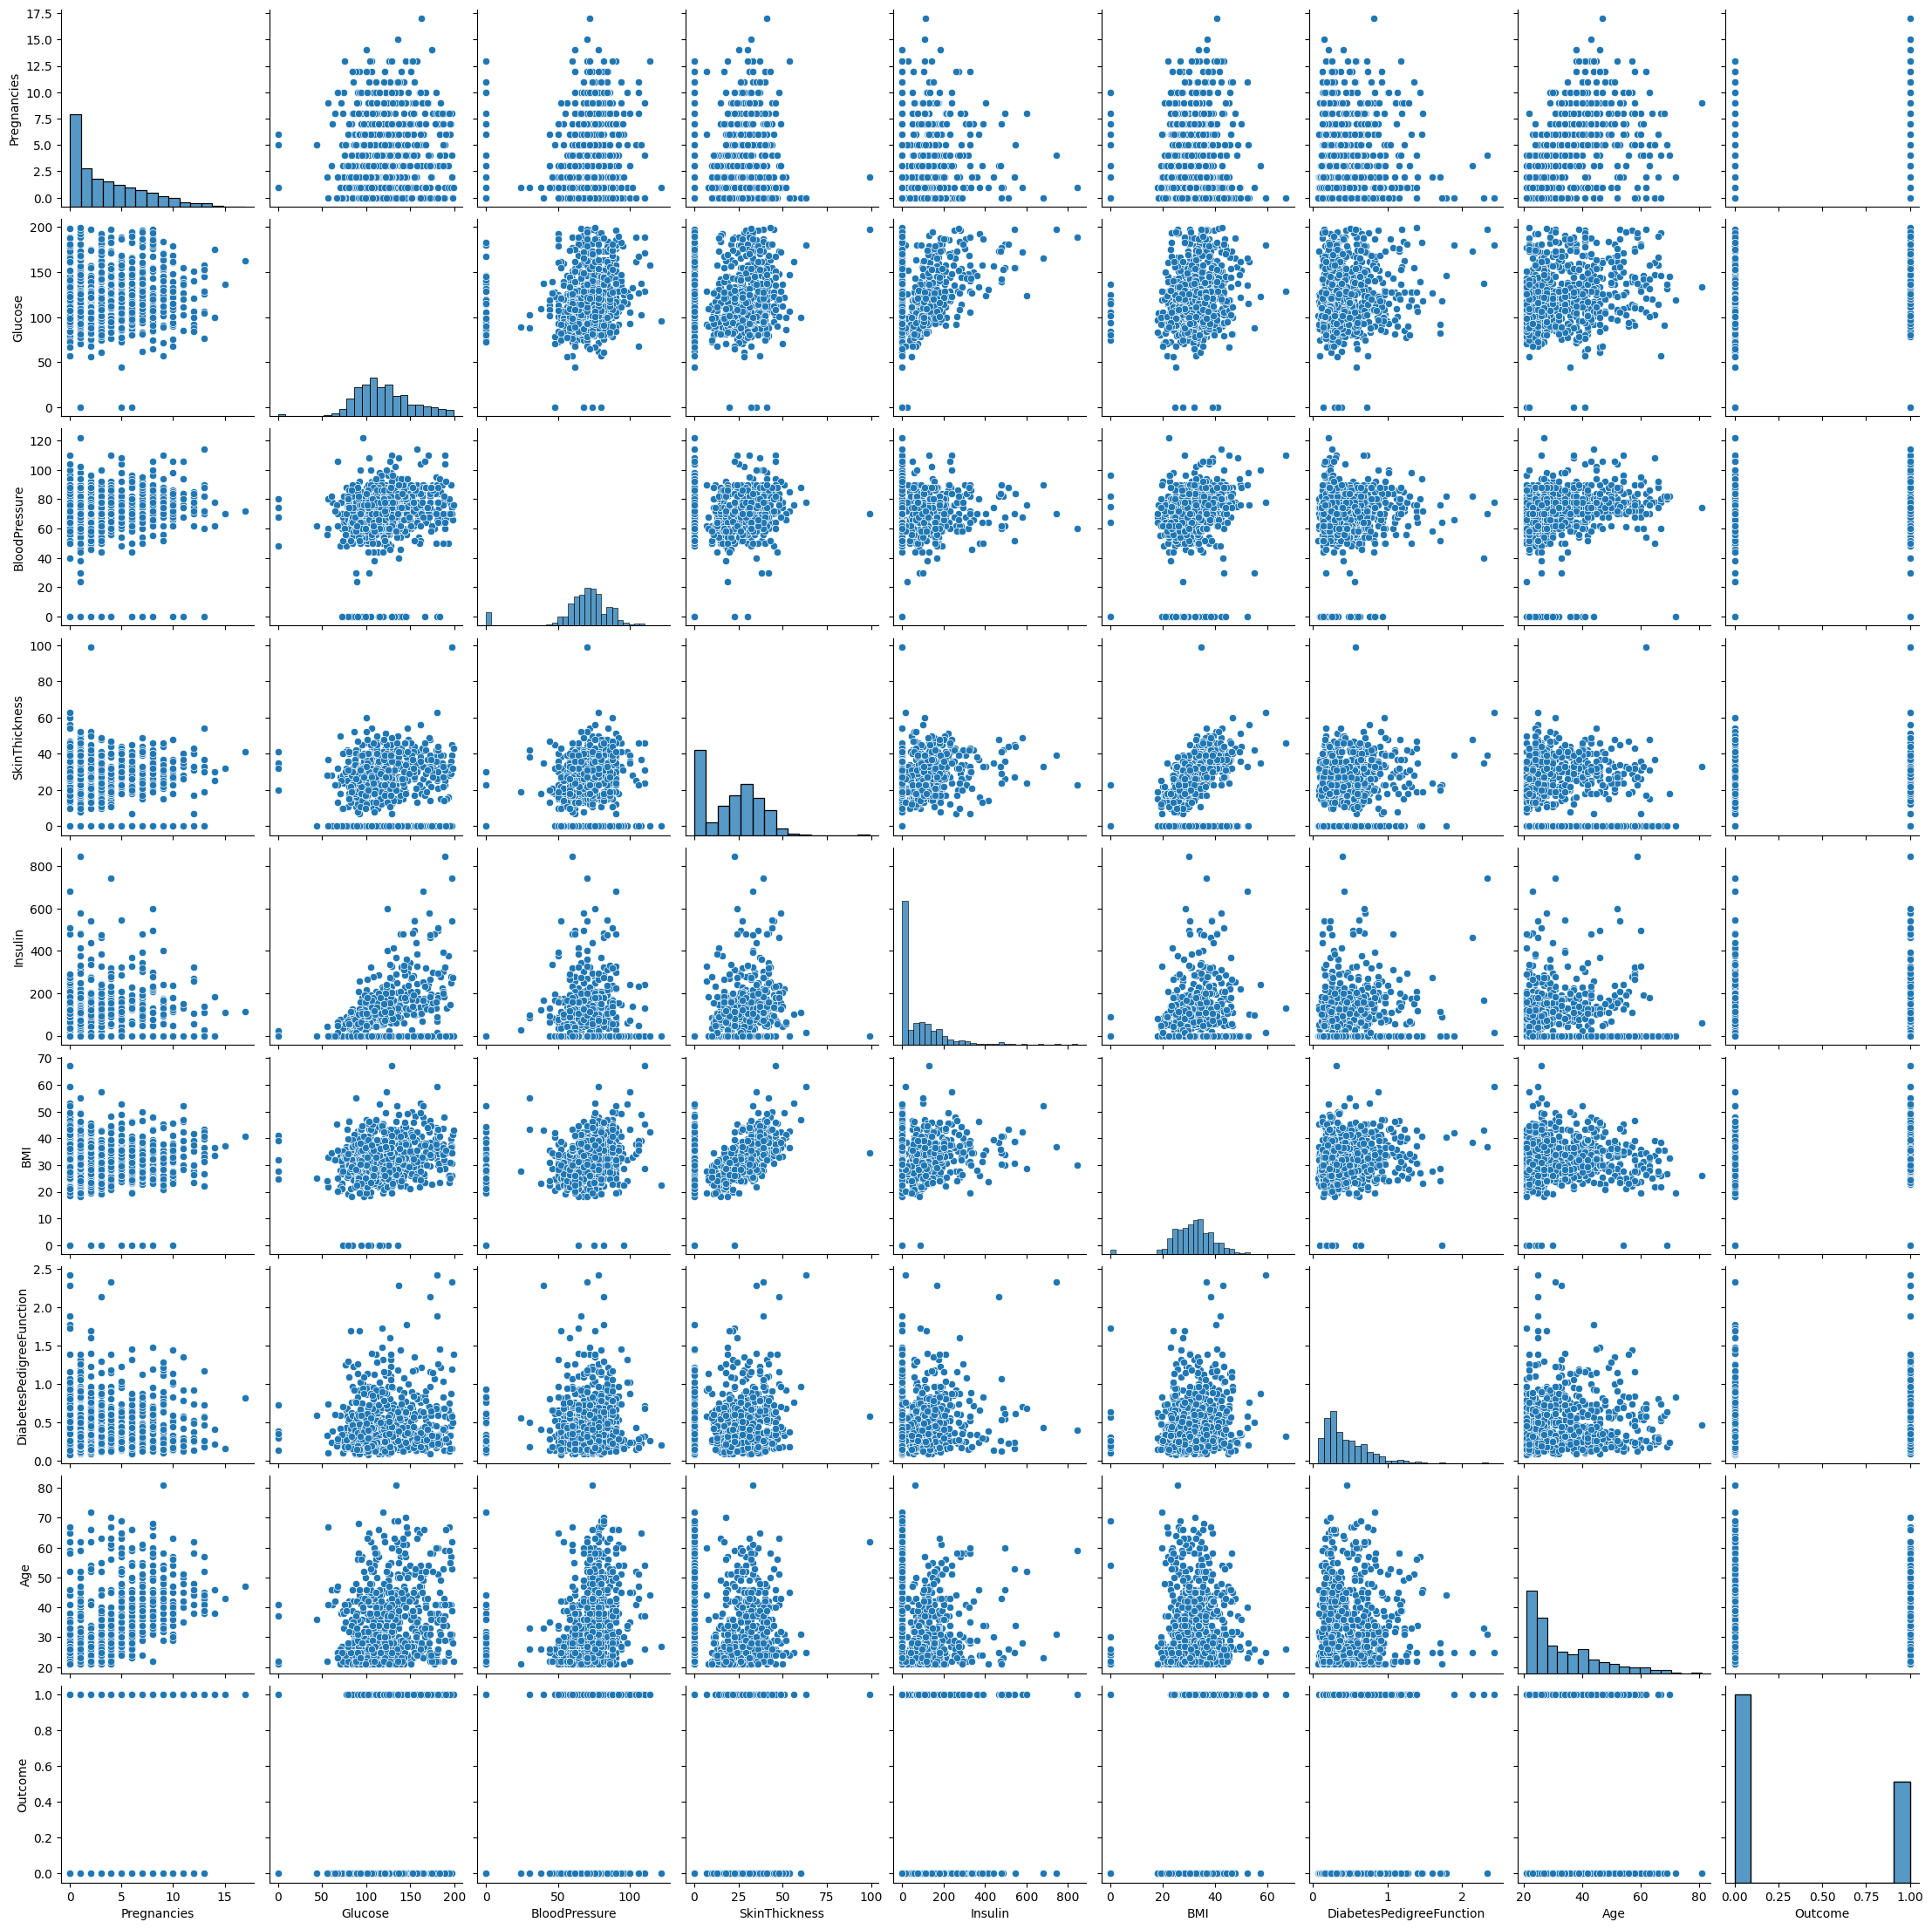

In [7]:
sns.pairplot(dataset);

In [8]:
dataset_corr= dataset.corr()
dataset_corr

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [9]:
dataset_corr.shape

(9, 9)

In [10]:
heat_mask= np.zeros((9, 9))
for i in range(0, 9):
    for j in range(0, 9):
        if (j - i) >= 0:
            heat_mask[i, j]= 1

heat_mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

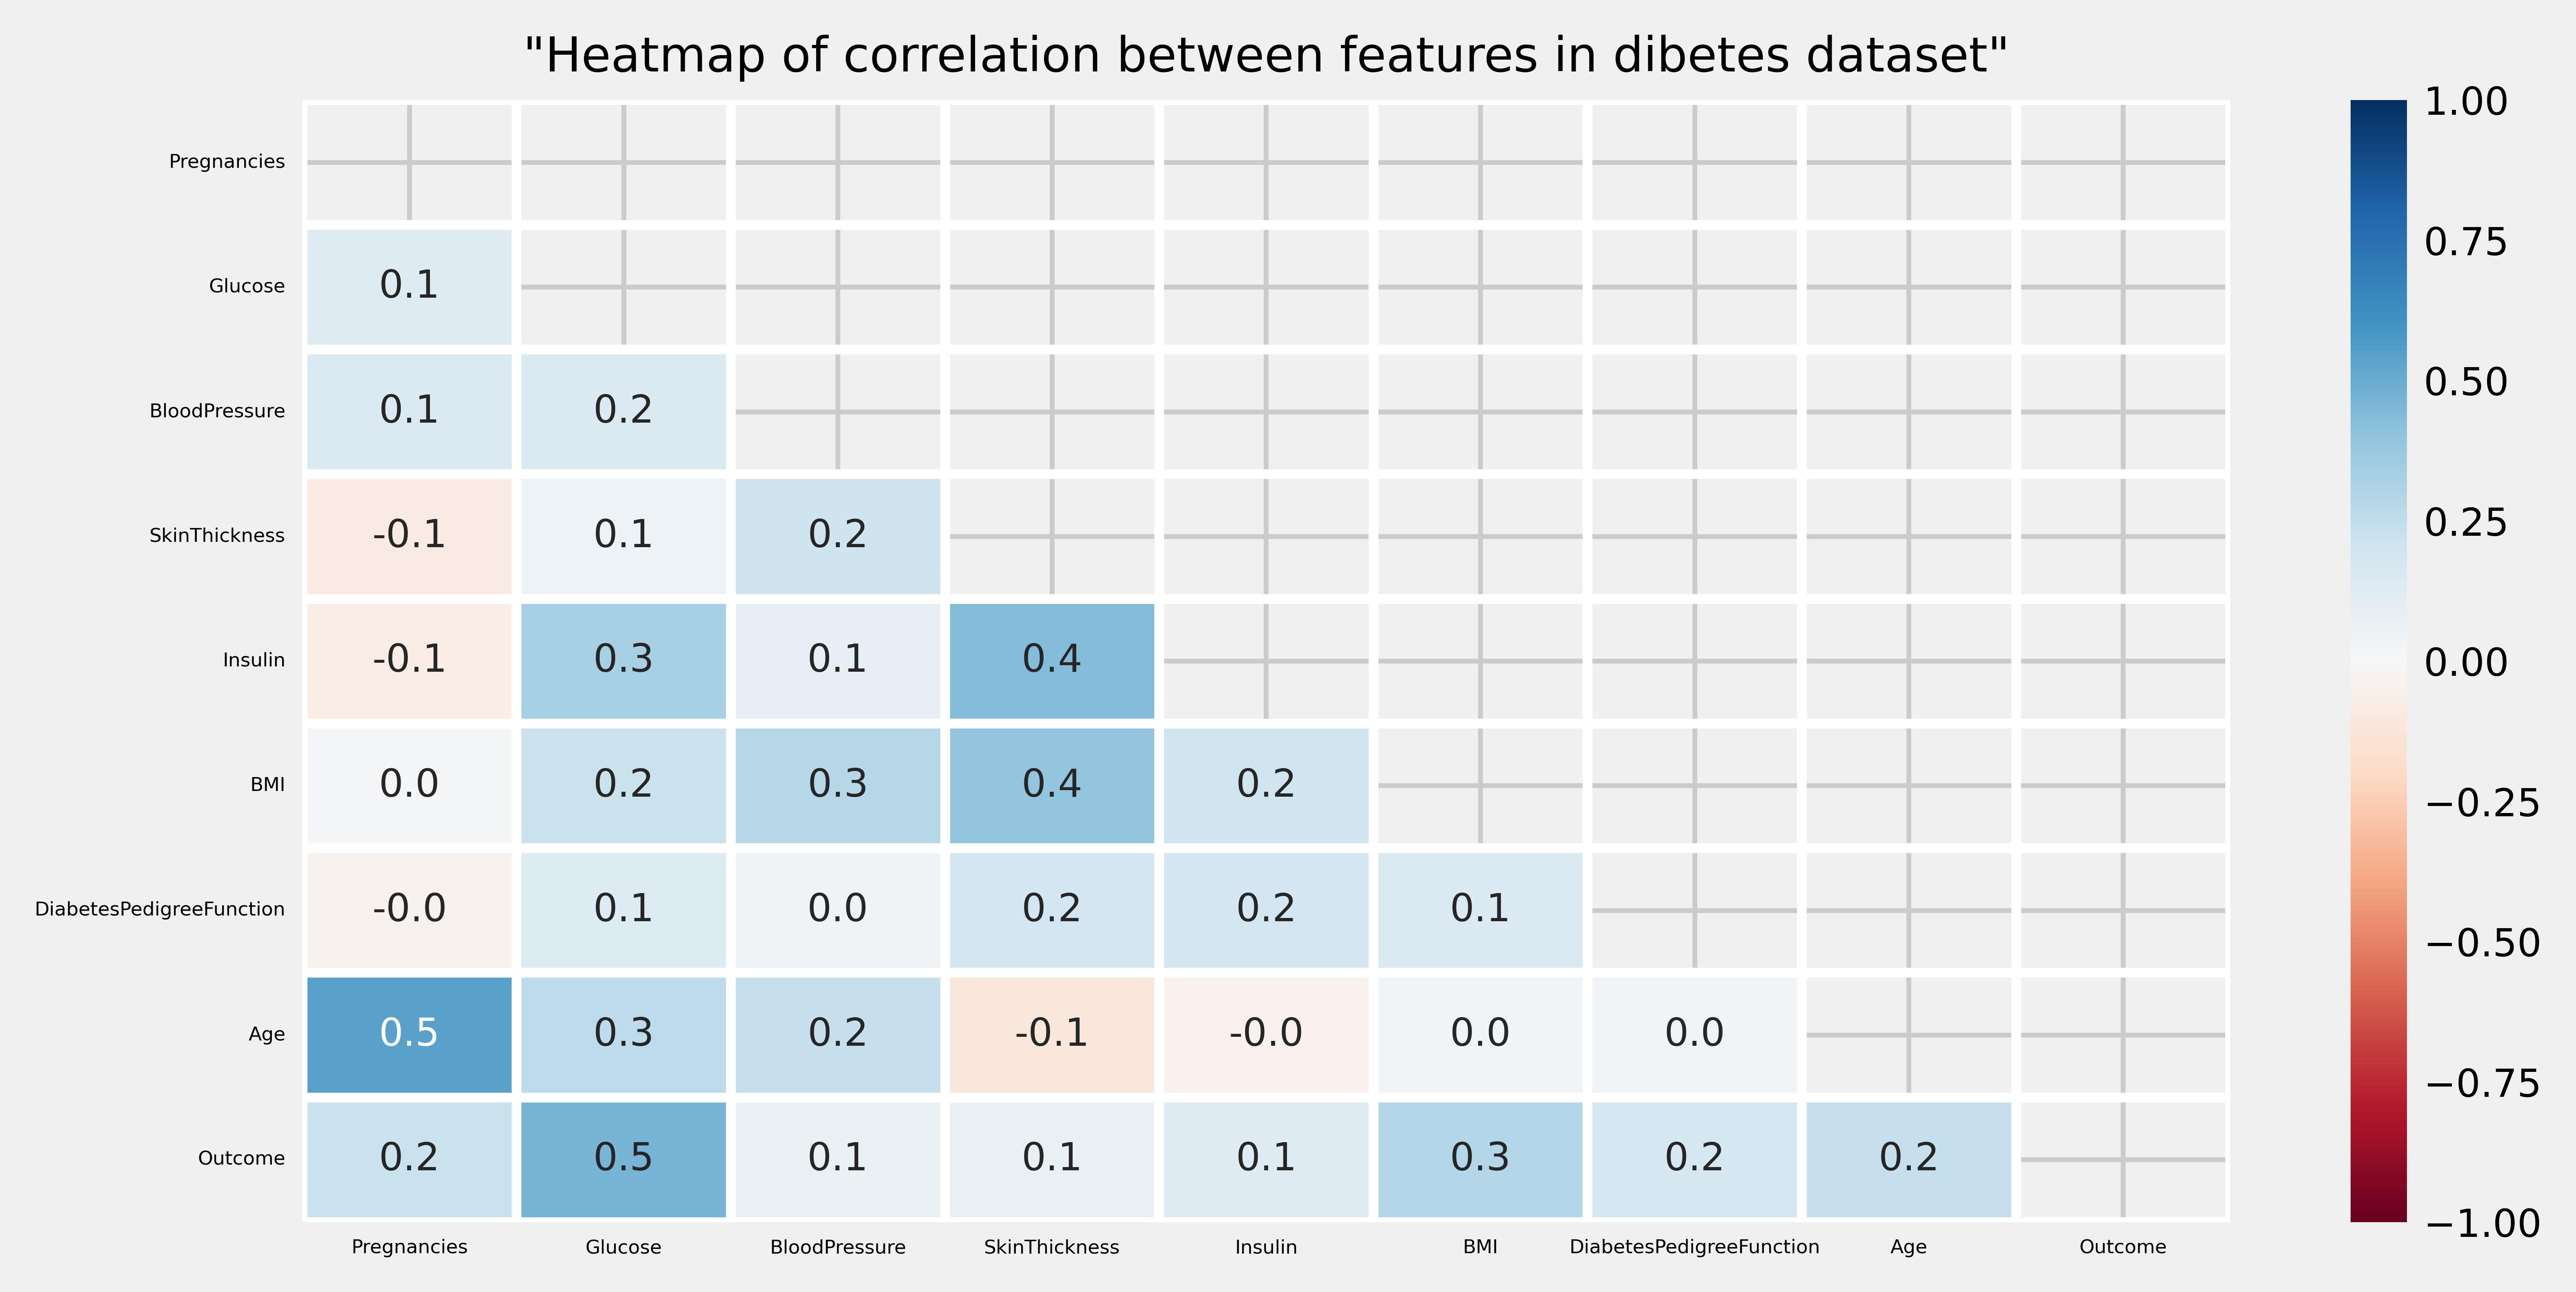

In [11]:
plt.style.use('fivethirtyeight')
fig, ax= plt.subplots(figsize= (8, 4), dpi= 848)
heatmap= sns.heatmap(dataset_corr, ax= ax, vmin= -1, vmax= +1, annot= True, annot_kws={"fontsize": 8}, fmt= '.1f', linecolor= 'white', linewidths= 2, cmap= 'RdBu', mask= heat_mask)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize= 8)
ax.set_yticklabels(dataset.columns, fontsize= 4)
ax.set_xticklabels(dataset.columns, fontsize= 4, rotation= 0)
ax.set_title('"Heatmap of correlation between features in dibetes dataset"', fontsize= 10);

Creating a function for box-plot

In [12]:
def box_plot(data):
    column_name= data.name
    y_ticks= [np.quantile(data, 0), np.quantile(data, 0.25), np.quantile(data, 0.5), np.quantile(data, 0.75), np.quantile(data, 1)]
    plt.style.use('fivethirtyeight')
    fig, ax= plt.subplots(figsize= (4, 3), dpi= 148)
    ax.boxplot(data, notch= True, patch_artist= True, widths= 0.084, boxprops= dict(facecolor= 'C0'))
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_ticks, fontsize= 4)
    ax.set_xticklabels([column_name], fontsize= 6)
    ax.set_title(f'"{column_name}" box-plot', fontsize= 8);

Creating a list of numerical columns that we want to check

as you can see all the features in dataset are numerical

In [13]:
numerical_columns= dataset.describe().columns.to_list()
numerical_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

Checking the "Pregnancies" column

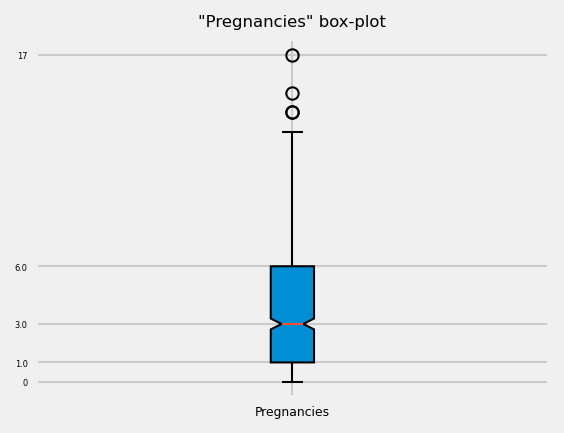

In [14]:
box_plot(dataset['Pregnancies'])

as you can see, it seems normal but we can check the age of people that have more than 6 babies

it also seems normal

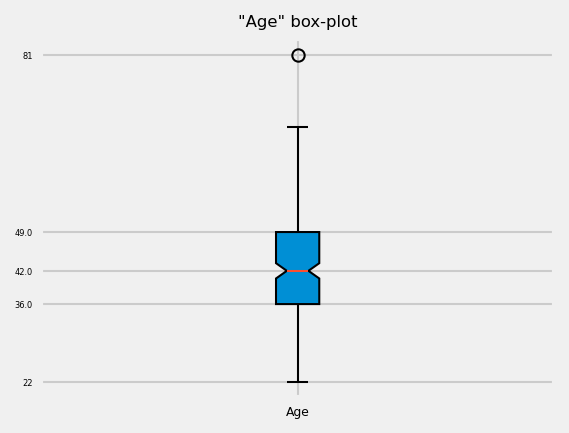

In [15]:
box_plot(dataset[dataset['Pregnancies'] >= 6]['Age'])

In [16]:
dataset[dataset['Pregnancies'] >= 6]['Age'].describe()

count    219.000000
mean      42.639269
std        9.920903
min       22.000000
25%       36.000000
50%       42.000000
75%       49.000000
max       81.000000
Name: Age, dtype: float64

Checking the "Glucose" column

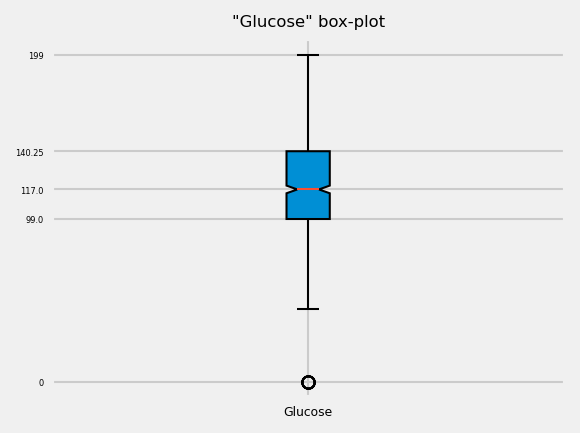

In [17]:
box_plot(dataset['Glucose'])

We have some missing values in "Glucose" column that they filled with 0, we're gonna put NaN instead of 0

In [18]:
dataset[dataset['Glucose'] == 0]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1        0             48             20        0  24.7   
182            1        0             74             20       23  27.7   
342            1        0             68             35        0  32.0   
349            5        0             80             32        0  41.0   
502            6        0             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1

In [19]:
dataset['Glucose']= dataset['Glucose'].apply(lambda x: np.nan if x == 0 else x)
dataset[dataset['Glucose'].astype('str') == 'nan']

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
75             1      NaN             48             20        0  24.7   
182            1      NaN             74             20       23  27.7   
342            1      NaN             68             35        0  32.0   
349            5      NaN             80             32        0  41.0   
502            6      NaN             68             41        0  39.0   

     DiabetesPedigreeFunction  Age  Outcome  
75                      0.140   22        0  
182                     0.299   21        0  
342                     0.389   22        0  
349                     0.346   37        1  
502                     0.727   41        1

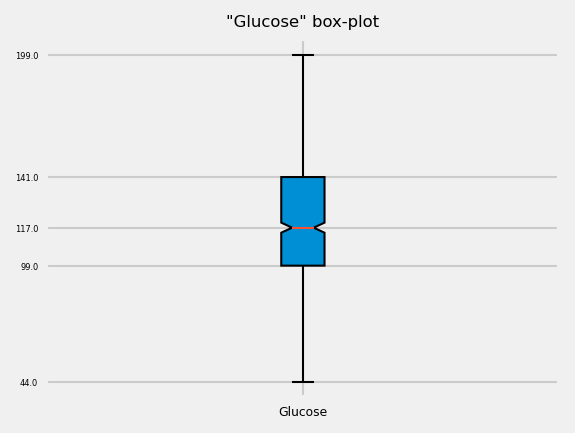

In [20]:
box_plot(dataset[dataset['Glucose'].astype('str') != 'nan']['Glucose'])

Checking the "BloodPressure" column

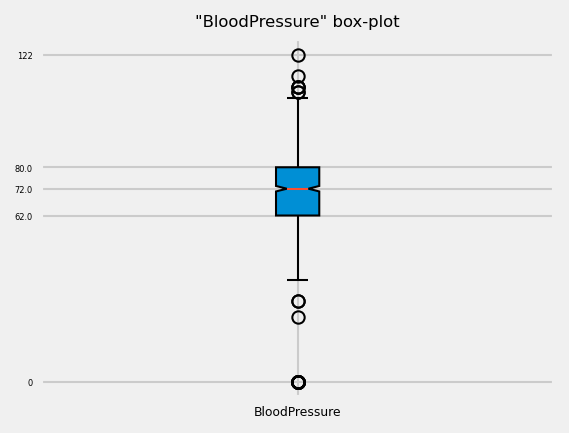

In [21]:
box_plot(dataset['BloodPressure'])

as you can see, we have 0 as a value for blood pressure in dataset that doesn't seem right, so we're gonna find them and replace 0 with NaN

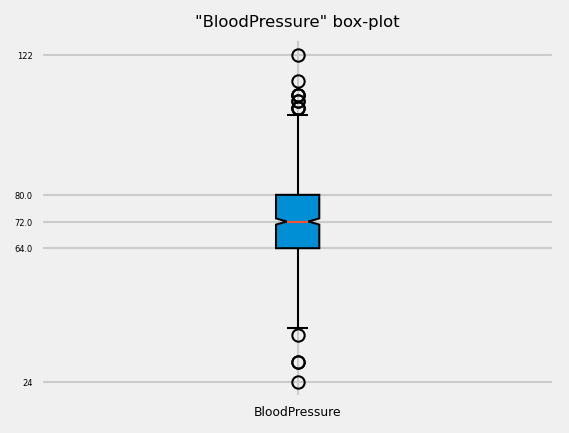

In [22]:
box_plot(dataset[dataset['BloodPressure'] != 0]['BloodPressure'])

In [23]:
dataset['BloodPressure']= dataset['BloodPressure'].apply(lambda x: np.nan if x == 0 else x)
dataset[dataset['BloodPressure'].astype('str') == 'nan']

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
7             10    115.0            NaN              0        0  35.3   
15             7    100.0            NaN              0        0  30.0   
49             7    105.0            NaN              0        0   0.0   
60             2     84.0            NaN              0        0   0.0   
78             0    131.0            NaN              0        0  43.2   
81             2     74.0            NaN              0        0   0.0   
172            2     87.0            NaN             23        0  28.9   
193           11    135.0            NaN              0        0  52.3   
222            7    119.0            NaN              0        0  25.2   
261            3    141.0            NaN              0        0  30.0   
266            0    138.0            NaN              0        0  36.3   
269            2    146.0            NaN              0        0  27.5   
300            0    167.0            NaN              0        0  32.3   
332            1    180.0            NaN              0        0  43.3   
336            0    117.0            NaN              0        0  33.8   
347            3    116.0            NaN              0        0  23.5   
357           13    129.0            NaN             30        0  39.9   
426            0     94.0            NaN              0        0   0.0   
430            2     99.0            NaN              0        0  22.2   
435            0    141.0            NaN              0        0  42.4   
453            2    119.0            NaN              0        0  19.6   
468            8    120.0            NaN              0        0  30.0   
484            0    145.0            NaN              0        0  44.2   
494            3     80.0            NaN              0        0   0.0   
522            6    114.0            NaN              0        0   0.0   
533            6     91.0            NaN              0        0  29.8   
535            4    132.0            NaN              0        0  32.9   
589            0     73.0            NaN              0        0  21.1   
601            6     96.0            NaN              0        0  23.7   
604            4    183.0            NaN              0        0  28.4   
619            0    119.0            NaN              0        0  32.4   
643            4     90.0            NaN              0        0  28.0   
697            0     99.0            NaN              0        0  25.0   
703            2    129.0            NaN              0        0  38.5   
706           10    115.0            NaN              0        0   0.0   

     DiabetesPedigreeFunction  Age  Outcome  
7                       0.134   29        0  
15                      0.484   32        1  
49                      0.305   24        0  
60                      0.304   21        0  
78                      0.270   26        1  
81                      0.102   22        0  
172                     0.773   25        0  
193                     0.578   40        1  
222                     0.209   37        0  
261                     0.761   27        1  
266                     0.933   25        1  
269                     0.240   28        1  
300                     0.839   30        1  
332                     0.282   41        1  
336                     0.932   44        0  
347                     0.187   23        0  
357                     0.569   44        1  
426                     0.256   25        0  
430                     0.108   23        0  
435                     0.205   29        1  
453                     0.832   72        0  
468                     0.183   38        1  
484                     0.630   31        1  
494                     0.174   22        0  
522                     0.189   26        0  
533                     0.501   31        0  
535                     0.302   23        1  
589                     0.342   25        0  
601   

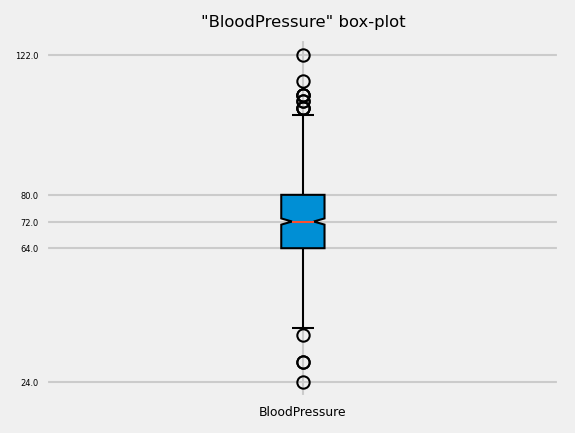

In [24]:
box_plot(dataset[dataset['BloodPressure'].astype('str') != 'nan']['BloodPressure'])

Checking the "SkinThickness" column

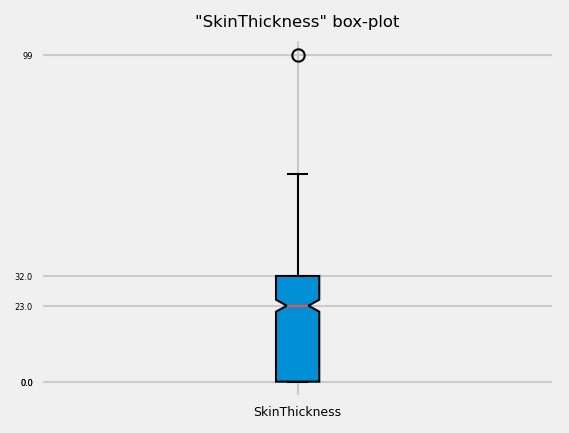

In [25]:
box_plot(dataset['SkinThickness'])

As you can see, there is some records with 0 SkinThickness, so we're gonna replace 0 with NaN

In [26]:
dataset[dataset['SkinThickness'] == 0]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2              8    183.0           64.0              0        0  23.3   
5              5    116.0           74.0              0        0  25.6   
7             10    115.0            NaN              0        0  35.3   
9              8    125.0           96.0              0        0   0.0   
10             4    110.0           92.0              0        0  37.6   
..           ...      ...            ...            ...      ...   ...   
757            0    123.0           72.0              0        0  36.3   
758            1    106.0           76.0              0        0  37.5   
759            6    190.0           92.0              0        0  35.5   
762            9     89.0           62.0              0        0  22.5   
766            1    126.0           60.0              0        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
2                       0.672   32        1  
5                       0.201   30        0  
7                       0.134   29        0  
9                       0.232   54        1  
10                      0.191   30        0  
..                        ...  ...      ...  
757                     0.258   52        1  
758                     0.197   26        0  
759                     0.278   66        1  
762                     0.142   33        0  
766                     0.349   47        1  

[227 rows x 9 columns]

In [27]:
dataset['SkinThickness']= dataset['SkinThickness'].apply(lambda x: np.nan if x == 0 else x)
dataset[dataset['SkinThickness'].astype('str') == 'nan']

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2              8    183.0           64.0            NaN        0  23.3   
5              5    116.0           74.0            NaN        0  25.6   
7             10    115.0            NaN            NaN        0  35.3   
9              8    125.0           96.0            NaN        0   0.0   
10             4    110.0           92.0            NaN        0  37.6   
..           ...      ...            ...            ...      ...   ...   
757            0    123.0           72.0            NaN        0  36.3   
758            1    106.0           76.0            NaN        0  37.5   
759            6    190.0           92.0            NaN        0  35.5   
762            9     89.0           62.0            NaN        0  22.5   
766            1    126.0           60.0            NaN        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
2                       0.672   32        1  
5                       0.201   30        0  
7                       0.134   29        0  
9                       0.232   54        1  
10                      0.191   30        0  
..                        ...  ...      ...  
757                     0.258   52        1  
758                     0.197   26        0  
759                     0.278   66        1  
762                     0.142   33        0  
766                     0.349   47        1  

[227 rows x 9 columns]

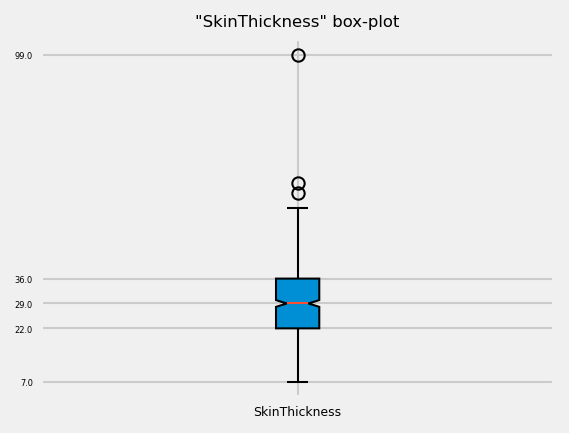

In [28]:
box_plot(dataset[dataset['SkinThickness'].astype('str') != 'nan']['SkinThickness'])

Checking the "Insulin" column

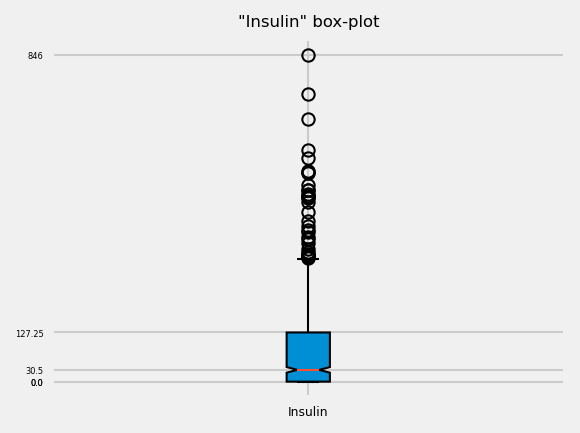

In [29]:
box_plot(dataset['Insulin'])

As you can see, there is some records with 0 value for Insulin, so we're gonna find them and replace them with NaN

In [30]:
dataset[dataset['Insulin'] == 0]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0        0  33.6   
1              1     85.0           66.0           29.0        0  26.6   
2              8    183.0           64.0            NaN        0  23.3   
5              5    116.0           74.0            NaN        0  25.6   
7             10    115.0            NaN            NaN        0  35.3   
..           ...      ...            ...            ...      ...   ...   
761            9    170.0           74.0           31.0        0  44.0   
762            9     89.0           62.0            NaN        0  22.5   
764            2    122.0           70.0           27.0        0  36.8   
766            1    126.0           60.0            NaN        0  30.1   
767            1     93.0           70.0           31.0        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
5                       0.201   30        0  
7                       0.134   29        0  
..                        ...  ...      ...  
761                     0.403   43        1  
762                     0.142   33        0  
764                     0.340   27        0  
766                     0.349   47        1  
767                     0.315   23        0  

[374 rows x 9 columns]

In [31]:
dataset['Insulin']= dataset['Insulin'].apply(lambda x: np.nan if x == 0 else x)
dataset[dataset['Insulin'].astype('str') == 'nan']

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
5              5    116.0           74.0            NaN      NaN  25.6   
7             10    115.0            NaN            NaN      NaN  35.3   
..           ...      ...            ...            ...      ...   ...   
761            9    170.0           74.0           31.0      NaN  44.0   
762            9     89.0           62.0            NaN      NaN  22.5   
764            2    122.0           70.0           27.0      NaN  36.8   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
5                       0.201   30        0  
7                       0.134   29        0  
..                        ...  ...      ...  
761                     0.403   43        1  
762                     0.142   33        0  
764                     0.340   27        0  
766                     0.349   47        1  
767                     0.315   23        0  

[374 rows x 9 columns]

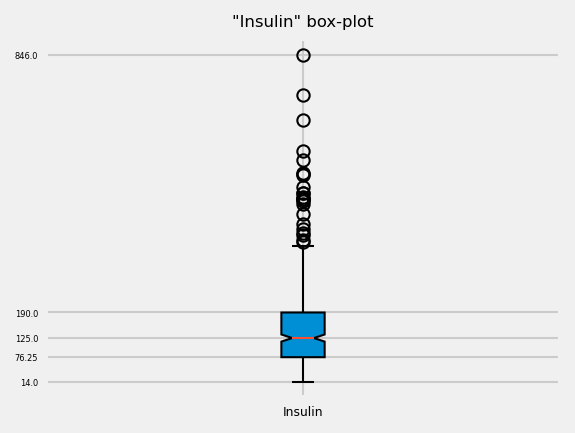

In [32]:
box_plot(dataset[dataset['Insulin'].astype('str') != 'nan']['Insulin'])

In this part, we're gonna check the count of persons that have diabetes

In [33]:
dataset[(dataset['Insulin'] > 200) & (dataset['Insulin'].astype('str') != 'nan')].groupby(['Outcome'])['Outcome'].count()

Outcome
0    39
1    46
Name: Outcome, dtype: int64

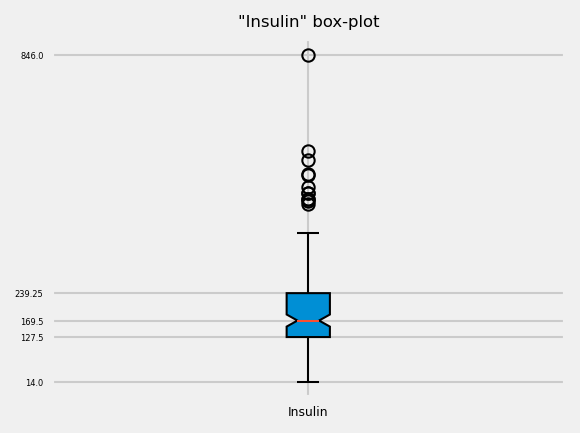

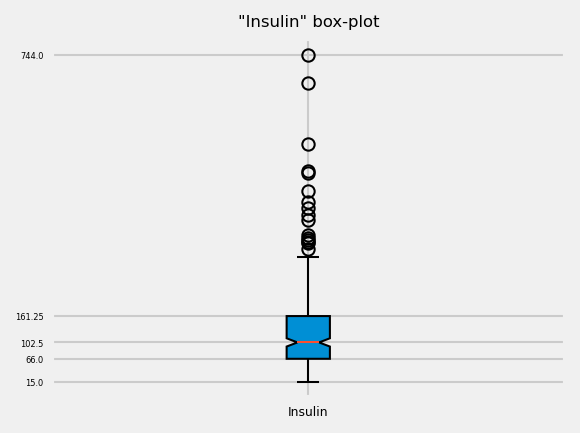

In [34]:
box_plot(dataset[(dataset['Insulin'].astype('str') != 'nan') & (dataset['Outcome'] == 1)]['Insulin'])
box_plot(dataset[(dataset['Insulin'].astype('str') != 'nan') & (dataset['Outcome'] == 0)]['Insulin'])

It seems that we have fake data!

Checking the "BMI" column

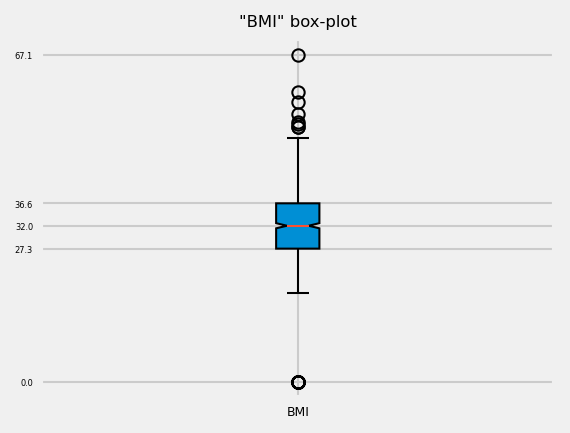

In [35]:
box_plot(dataset['BMI'])

As usual in this dataset, we have 0 value for BMI in this dataset for some records, so we're gonna replace it with NaN

In [36]:
dataset['BMI']= dataset['BMI'].apply(lambda x: np.nan if x == 0 else x)
dataset[dataset['BMI'].astype('str') == 'nan']

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
9              8    125.0           96.0            NaN      NaN  NaN   
49             7    105.0            NaN            NaN      NaN  NaN   
60             2     84.0            NaN            NaN      NaN  NaN   
81             2     74.0            NaN            NaN      NaN  NaN   
145            0    102.0           75.0           23.0      NaN  NaN   
371            0    118.0           64.0           23.0     89.0  NaN   
426            0     94.0            NaN            NaN      NaN  NaN   
494            3     80.0            NaN            NaN      NaN  NaN   
522            6    114.0            NaN            NaN      NaN  NaN   
684            5    136.0           82.0            NaN      NaN  NaN   
706           10    115.0            NaN            NaN      NaN  NaN   

     DiabetesPedigreeFunction  Age  Outcome  
9                       0.232   54        1  
49                      0.305   24        0  
60                      0.304   21        0  
81                      0.102   22        0  
145                     0.572   21        0  
371                     1.731   21        0  
426                     0.256   25        0  
494                     0.174   22        0  
522                     0.189   26        0  
684                     0.640   69        0  
706                     0.261   30        1

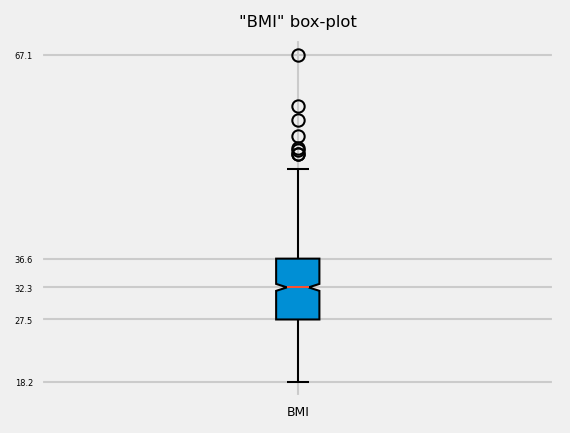

In [37]:
box_plot(dataset[dataset['BMI'].astype('str') != 'nan']['BMI'])

Checking the "DiabetesPendigreeFunction" column

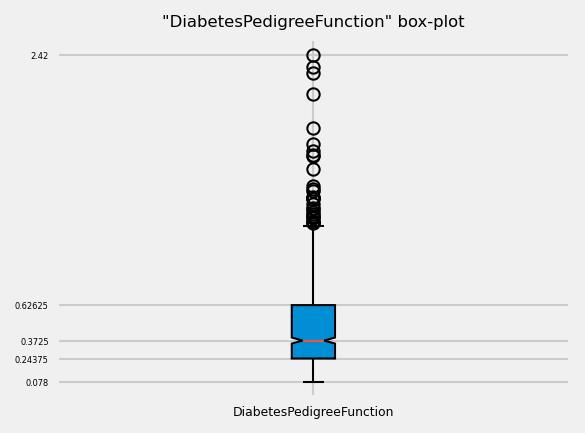

In [38]:
box_plot(dataset['DiabetesPedigreeFunction'])

Checking the "Age" column

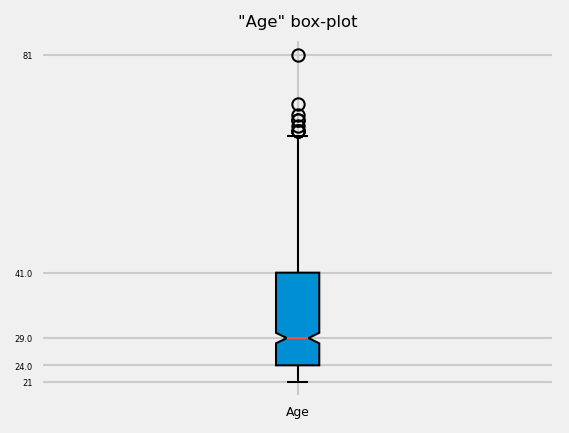

In [39]:
box_plot(dataset['Age'])

Checking the count of persons

In [40]:
dataset.groupby(['Outcome'])['Outcome'].count()

Outcome
0    500
1    268
Name: Outcome, dtype: int64

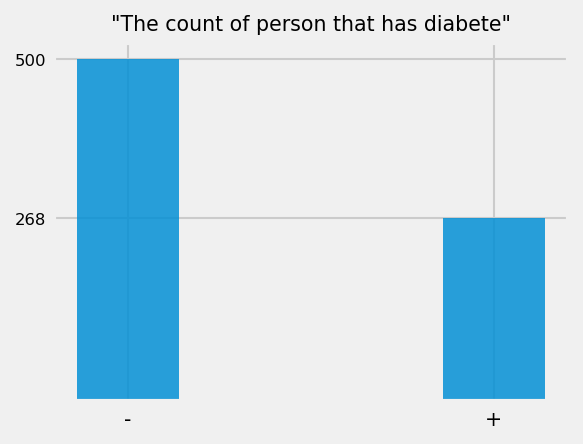

In [41]:
plt.style.use('fivethirtyeight')
fig, ax= plt.subplots(figsize= (4, 3), dpi= 148)
ax.bar(dataset.groupby(['Outcome'])['Outcome'].count().index, dataset.groupby(['Outcome'])['Outcome'].count().values, width= 0.28, alpha= 0.84)
ax.set_xticks([0, 1])
ax.set_xticklabels(["-", "+"], fontsize= 10)
ax.set_yticks([500, 268])
ax.set_yticklabels([500, 268], fontsize= 8)
ax.set_title('"The count of person that has diabete"', fontsize= 10);

Now we can check the informations about data again

In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [43]:
dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [44]:
dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  757.000000                768.000000  768.000000  768.000000  
mean    32.457464                  0.471876   33.240885    0.348958  
std      6.924988                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.300000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

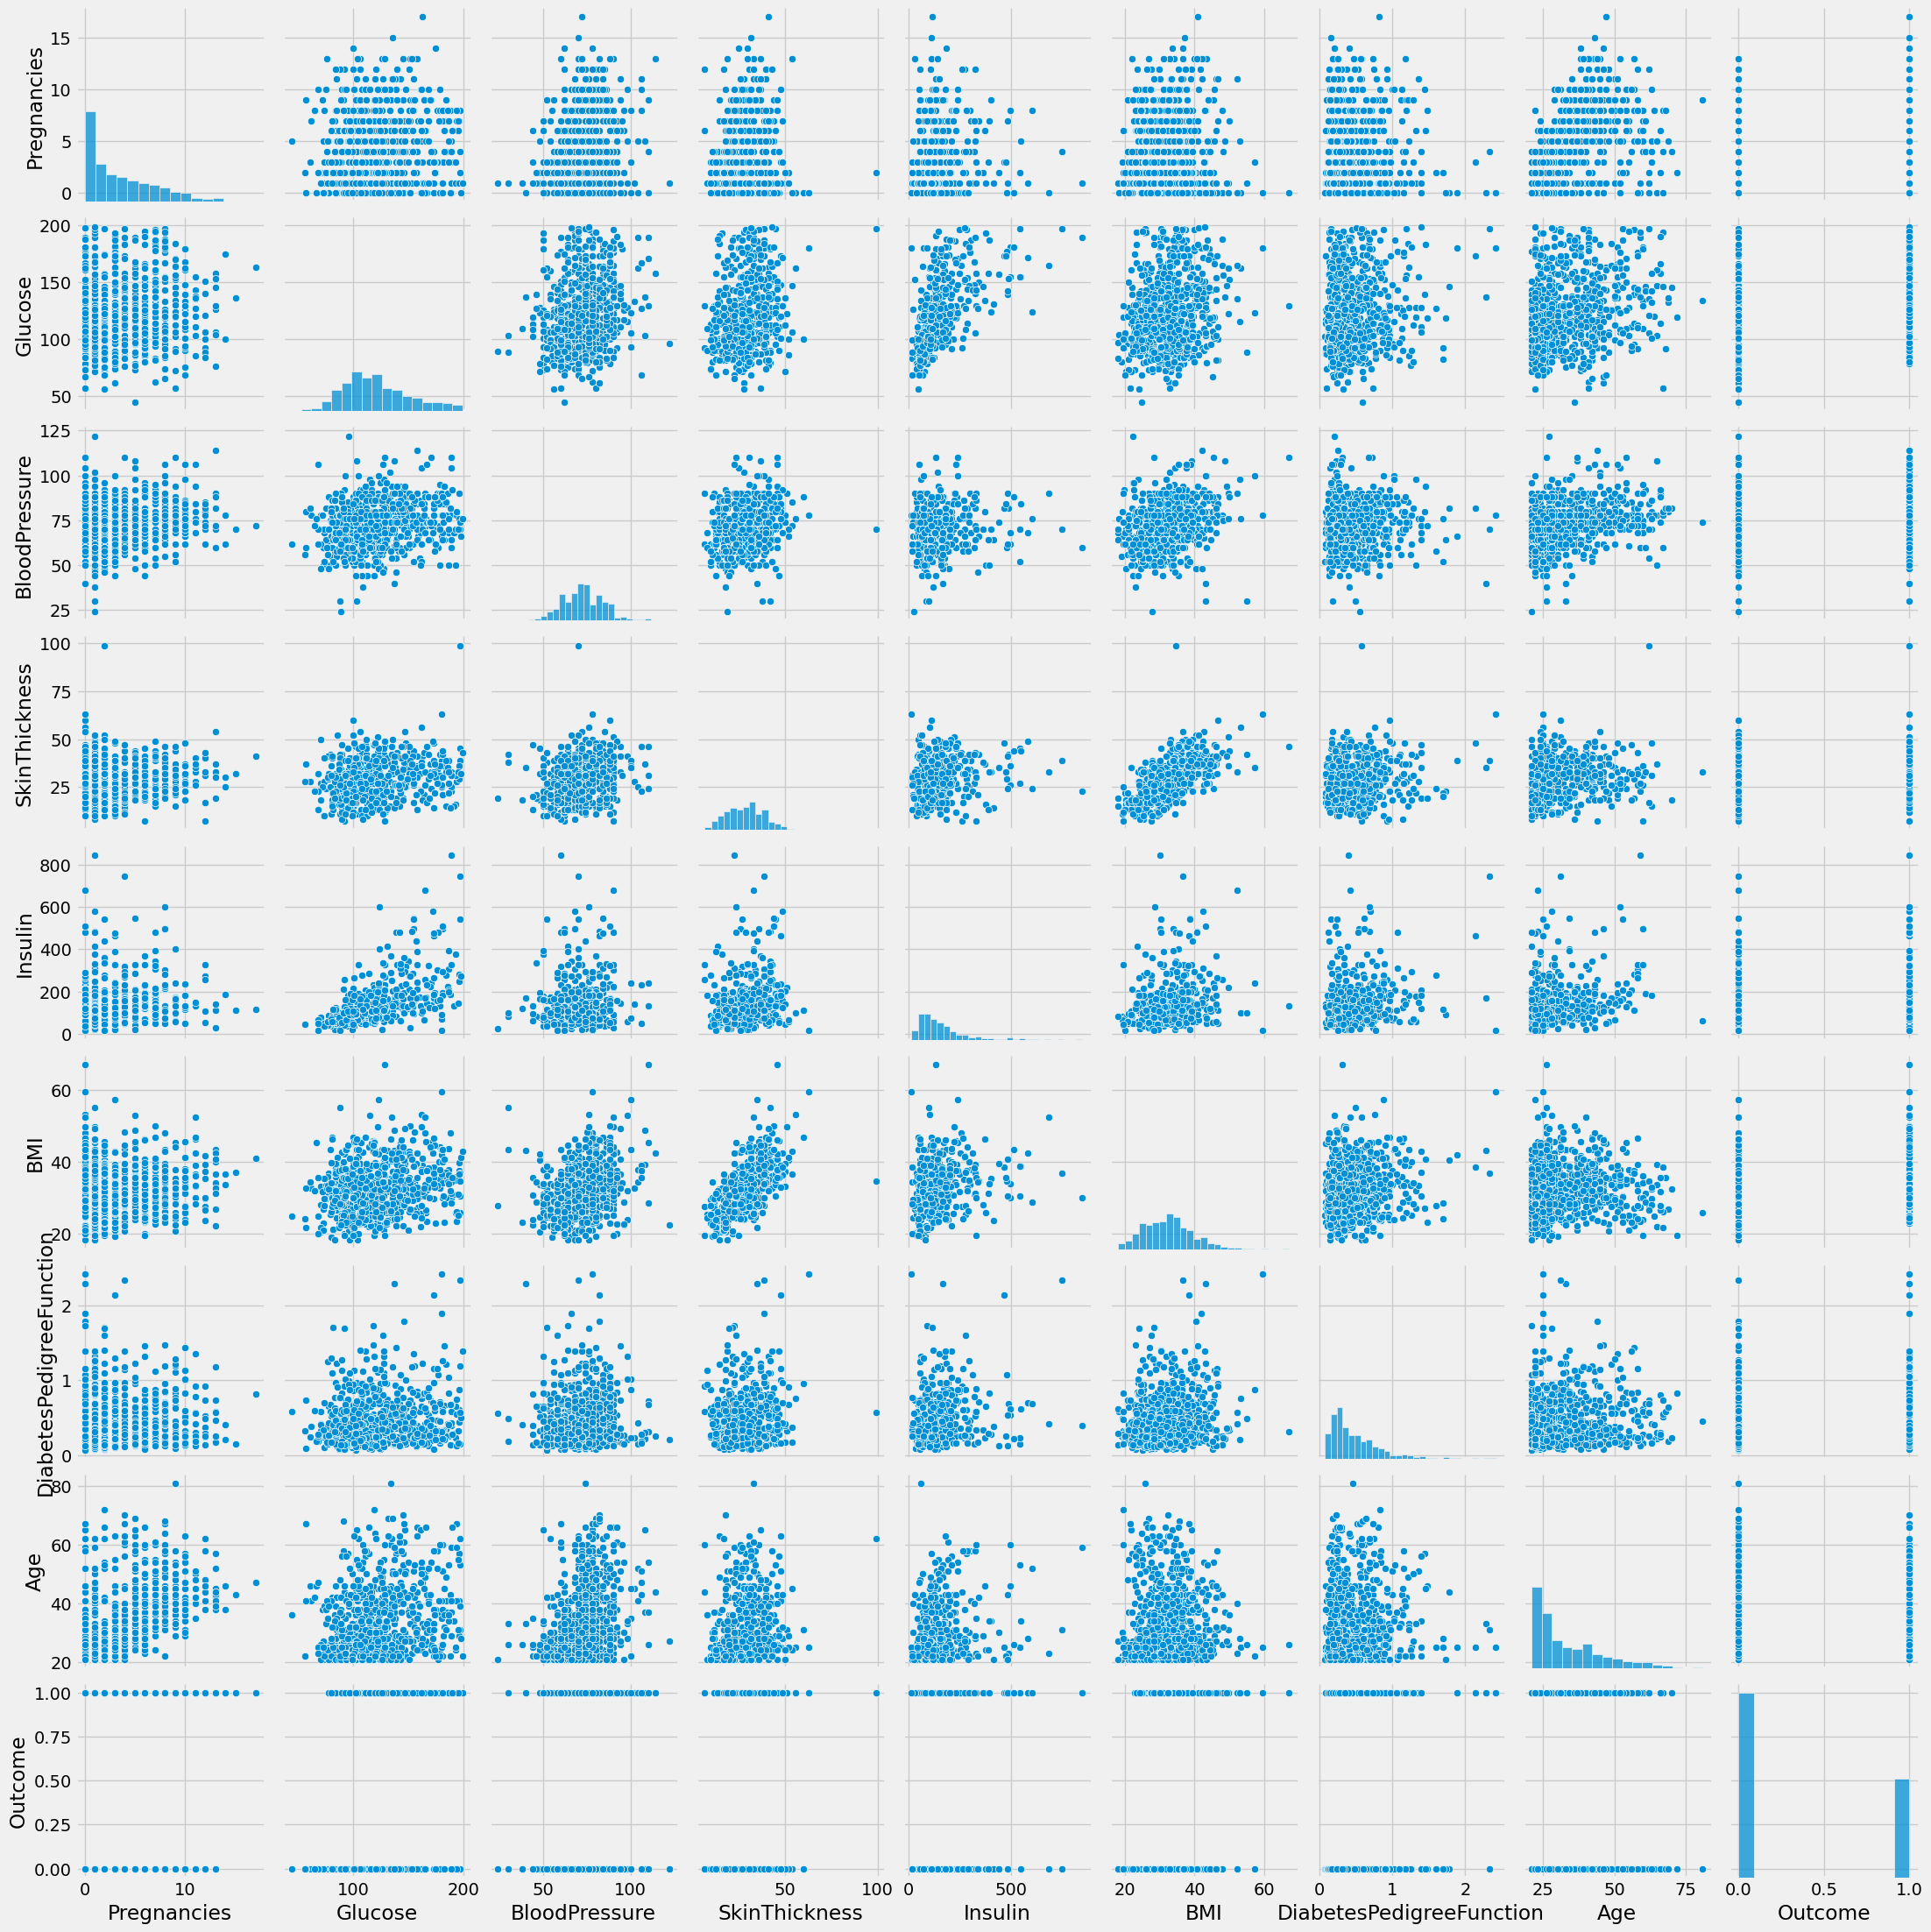

In [45]:
sns.pairplot(dataset);

In [46]:
dataset_corr= dataset.corr()
dataset_corr

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.128135       0.214178       0.100239   
Glucose                      0.128135  1.000000       0.223192       0.228043   
BloodPressure                0.214178  0.223192       1.000000       0.226839   
SkinThickness                0.100239  0.228043       0.226839       1.000000   
Insulin                      0.082171  0.581186       0.098272       0.184888   
BMI                          0.021719  0.232771       0.289230       0.648214   
DiabetesPedigreeFunction    -0.033523  0.137246      -0.002805       0.115016   
Age                          0.544341  0.267136       0.330107       0.166816   
Outcome                      0.221898  0.494650       0.170589       0.259491   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.082171  0.021719                 -0.033523   
Glucose                   0.581186  0.232771                  0.137246   
BloodPressure             0.098272  0.289230                 -0.002805   
SkinThickness             0.184888  0.648214                  0.115016   
Insulin                   1.000000  0.228050                  0.130395   
BMI                       0.228050  1.000000                  0.155382   
DiabetesPedigreeFunction  0.130395  0.155382                  1.000000   
Age                       0.220261  0.025841                  0.033561   
Outcome                   0.303454  0.313680                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.267136  0.494650  
BloodPressure             0.330107  0.170589  
SkinThickness             0.166816  0.259491  
Insulin                   0.220261  0.303454  
BMI                       0.025841  0.313680  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [47]:
heat_mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

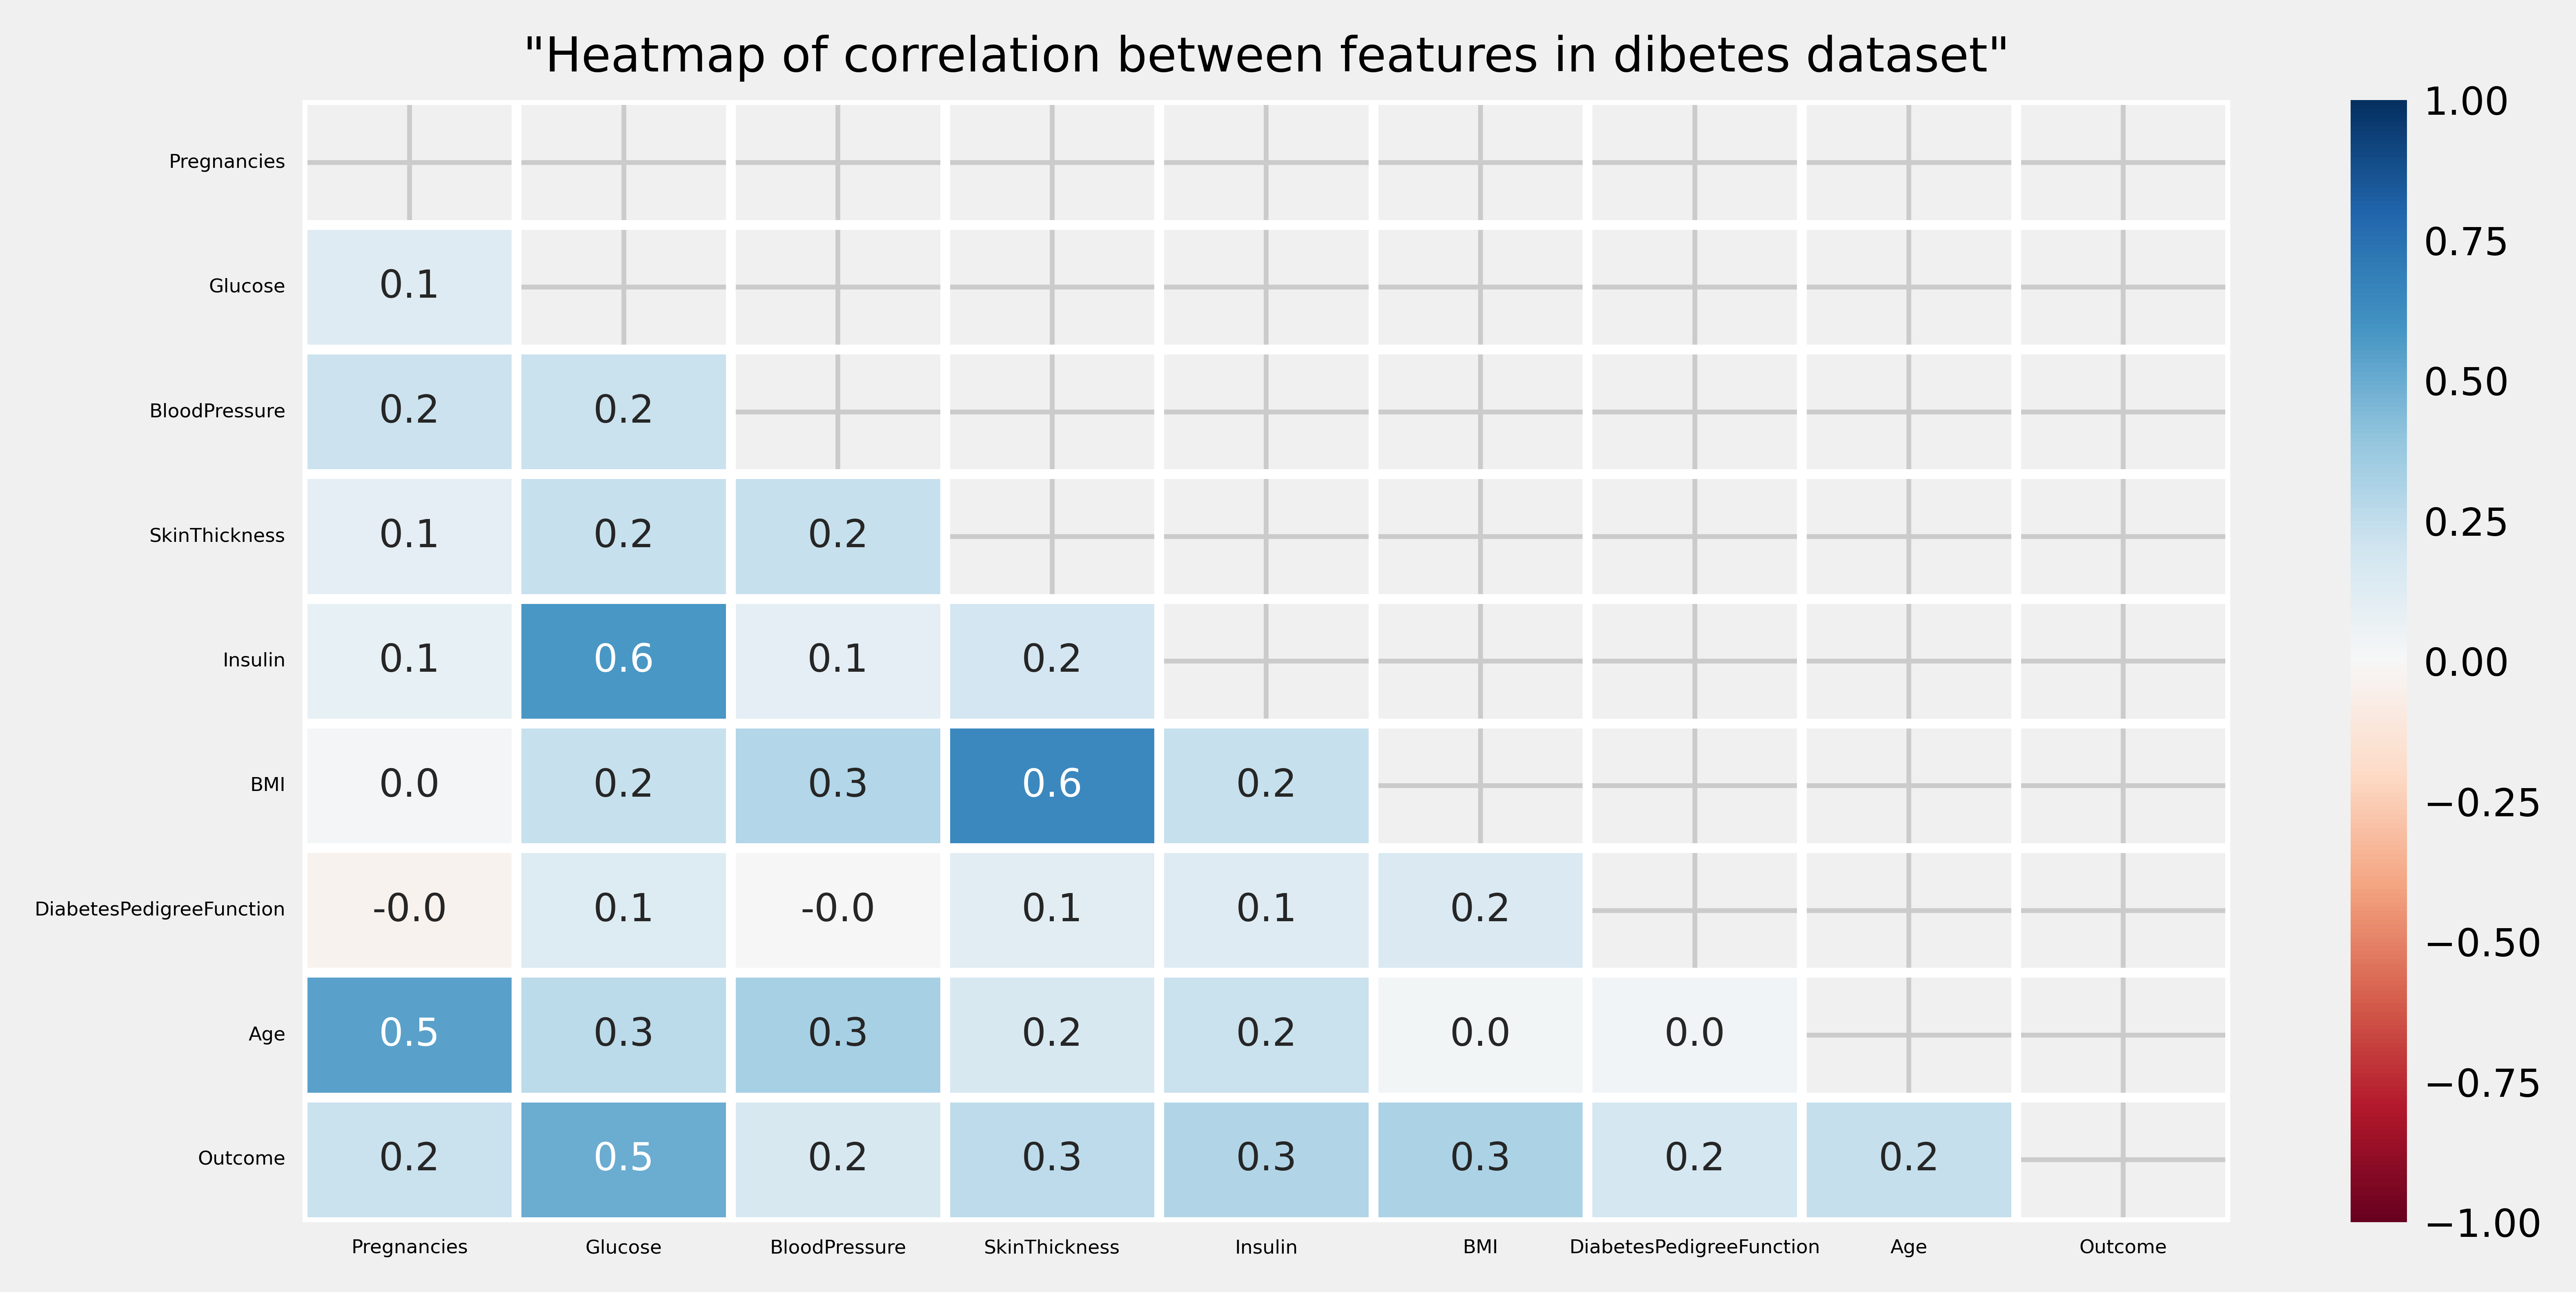

In [48]:
plt.style.use('fivethirtyeight')
fig, ax= plt.subplots(figsize= (8, 4), dpi= 848)
heatmap= sns.heatmap(dataset_corr, ax= ax, vmin= -1, vmax= +1, annot= True, annot_kws={"fontsize": 8}, fmt= '.1f', linecolor= 'white', linewidths= 2, cmap= 'RdBu', mask= heat_mask)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize= 8)
ax.set_yticklabels(dataset.columns, fontsize= 4)
ax.set_xticklabels(dataset.columns, fontsize= 4, rotation= 0)
ax.set_title('"Heatmap of correlation between features in dibetes dataset"', fontsize= 10);

# Pre-Processing

In [49]:
dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

Filling the NaN

As you can see in the correlation heat map, there is a good correlation between features and Outcome and also Age, so we're gonna use the groupby method and mean to fill the NaN

For age we should have some categories, so we're gonna make a feature named "Age-name" for this part

In [50]:
dataset['Age-name']= pd.cut(dataset['Age'], bins= [0, 13, 18, 34, 44, 200], labels= ['child', 'teenager', 'young', 'mid', 'old'])
dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0      NaN  33.6   
1            1     85.0           66.0           29.0      NaN  26.6   
2            8    183.0           64.0            NaN      NaN  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome Age-name  
0                     0.627   50        1      old  
1                     0.351   31        0    young  
2                     0.672   32        1    young  
3                     0.167   21        0    young  
4                     2.288   33        1    young

Now lets check the amount of different ages

In [51]:
dataset['Age-name'].value_counts()

Age-name
young       488
mid         147
old         133
child         0
teenager      0
Name: count, dtype: int64

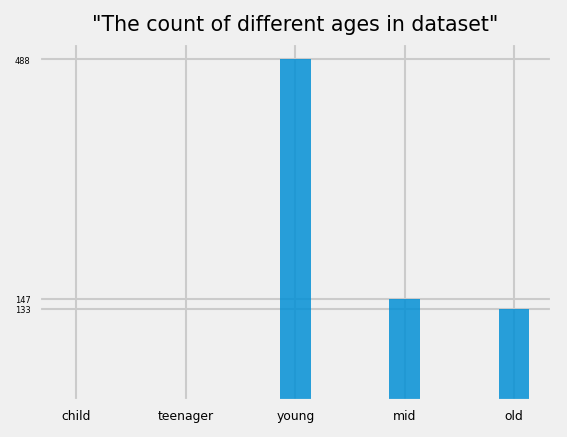

In [52]:
plt.style.use('fivethirtyeight')
fig, ax= plt.subplots(figsize= (4, 3), dpi= 148)
ax.bar([0, 1, 2, 3, 4], [0, 0, 488, 147, 133], width= 0.28, alpha= 0.84)
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels(["child", "teenager", "young", "mid", "old"], fontsize= 6)
ax.set_yticks([133, 147, 488])
ax.set_yticklabels([133, 147, 488], fontsize= 4)
ax.set_title('"The count of different ages in dataset"', fontsize= 10);

In [53]:
numerical_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [54]:
mean_NaN= dataset.groupby(by= ['Outcome', 'Age-name'])[numerical_columns[1 : 6]].mean().reset_index()
mean_NaN

Outcome  Age-name     Glucose  BloodPressure  SkinThickness     Insulin  \
0        0     child         NaN            NaN            NaN         NaN   
1        0  teenager         NaN            NaN            NaN         NaN   
2        0     young  108.272981      68.677233      26.461268  131.211982   
3        0       mid  111.014085      74.455882      30.652174  121.689655   
4        0       old  122.955224      78.757576      29.258065  133.000000   
5        1     child         NaN            NaN            NaN         NaN   
6        1  teenager         NaN            NaN            NaN         NaN   
7        1     young  139.555556      71.539130      33.818182  192.171429   
8        1       mid  143.527027      77.098592      32.104167  186.233333   
9        1       old  146.242424      80.000000      32.340909  261.700000   

         BMI  
0        NaN  
1        NaN  
2  30.690678  
3  32.008451  
4  30.530303  
5        NaN  
6        NaN  
7  36.130400  
8  35.913158  
9  33.423077

Now we should change the type of features in mean_NaN

In [55]:
for column_name in numerical_columns[1 : 5]:
    mean_NaN[column_name]= mean_NaN[column_name].apply(lambda x : int(x) if str(x) != 'nan' else x)
mean_NaN

Outcome  Age-name  Glucose  BloodPressure  SkinThickness  Insulin  \
0        0     child      NaN            NaN            NaN      NaN   
1        0  teenager      NaN            NaN            NaN      NaN   
2        0     young    108.0           68.0           26.0    131.0   
3        0       mid    111.0           74.0           30.0    121.0   
4        0       old    122.0           78.0           29.0    133.0   
5        1     child      NaN            NaN            NaN      NaN   
6        1  teenager      NaN            NaN            NaN      NaN   
7        1     young    139.0           71.0           33.0    192.0   
8        1       mid    143.0           77.0           32.0    186.0   
9        1       old    146.0           80.0           32.0    261.0   

         BMI  
0        NaN  
1        NaN  
2  30.690678  
3  32.008451  
4  30.530303  
5        NaN  
6        NaN  
7  36.130400  
8  35.913158  
9  33.423077

In [56]:
dataset.index

RangeIndex(start=0, stop=768, step=1)

In [57]:
def filling_NaN(data):
    column_name= data.name
    i= 0
    new_data= []
    for value in data:
        if str(value) != 'nan':
            new_data.append(value)
        else:
            Age_name= dataset.iloc[i]['Age-name']
            Outcome= dataset.iloc[i]['Outcome']
            new_value= mean_NaN[(mean_NaN['Age-name'] == Age_name) & (mean_NaN['Outcome'] == Outcome)][column_name].values[0]
            new_data.append(new_value)
        i= i + 1
    return new_data

In [58]:
for column_name in numerical_columns[1 : 6]:
    dataset[column_name]= filling_NaN(dataset[column_name])
dataset

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0    261.0  33.6   
1              1     85.0           66.0           29.0    131.0  26.6   
2              8    183.0           64.0           33.0    192.0  23.3   
3              1     89.0           66.0           23.0     94.0  28.1   
4              0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10    101.0           76.0           48.0    180.0  32.9   
764            2    122.0           70.0           27.0    131.0  36.8   
765            5    121.0           72.0           23.0    112.0  26.2   
766            1    126.0           60.0           32.0    261.0  30.1   
767            1     93.0           70.0           31.0    131.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome Age-name  
0                       0.627   50        1      old  
1                       0.351   31        0    young  
2                       0.672   32        1    young  
3                       0.167   21        0    young  
4                       2.288   33        1    young  
..                        ...  ...      ...      ...  
763                     0.171   63        0      old  
764                     0.340   27        0    young  
765                     0.245   30        0    young  
766                     0.349   47        1      old  
767                     0.315   23        0    young  

[768 rows x 10 columns]

In [59]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   Age-name                  768 non-null    category
dtypes: category(1), float64(6), int64(3)
memory usage: 55.1 KB


In [60]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Age-name                    0
dtype: int64

In [61]:
dataset.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.688802      72.342448      29.229167  157.010417   
std       3.369578   30.467428      12.120803       8.920310   90.070926   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  120.750000   
50%       3.000000  117.000000      72.000000      29.000000  131.000000   
75%       6.000000  141.000000      80.000000      33.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    32.442590                  0.471876   33.240885    0.348958  
std      6.879222                  0.331329   11.760232    0.476951  
min     18.200000                  0.078000   21.000000    0.000000  
25%     27.500000                  0.243750   24.000000    0.000000  
50%     32.050000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

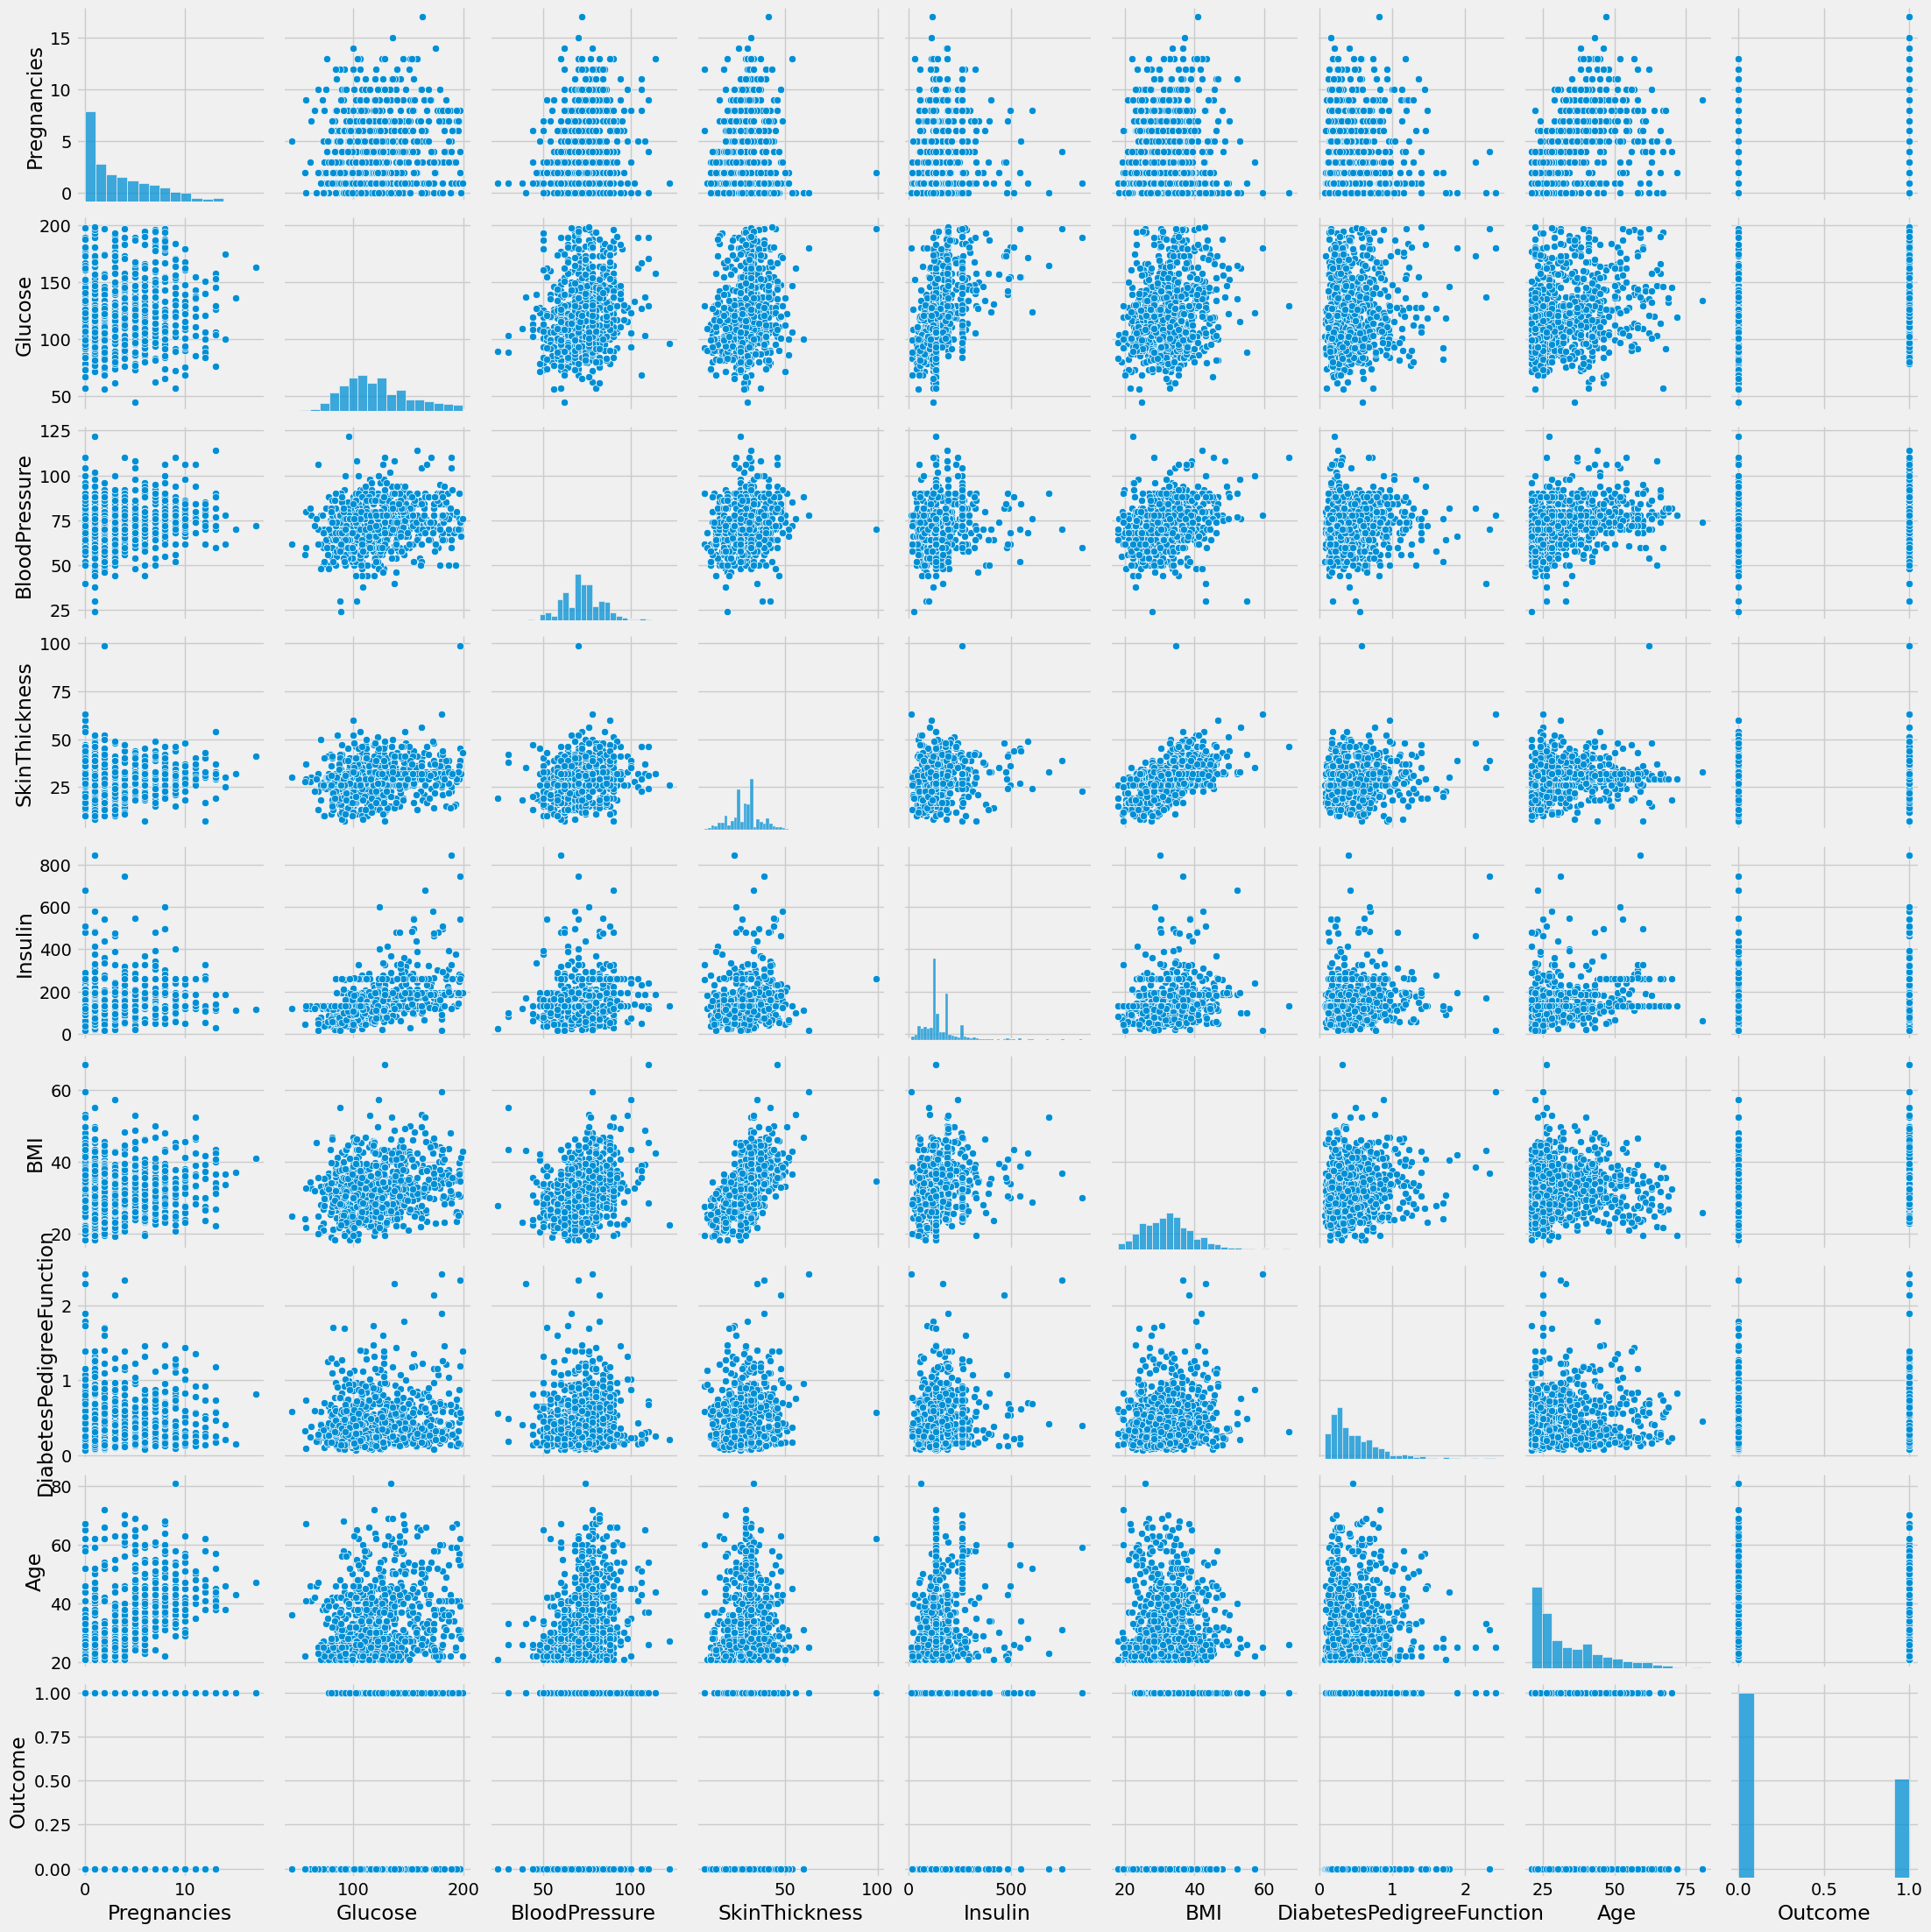

In [62]:
sns.pairplot(dataset);

In [63]:
dataset_corr= (dataset[dataset.columns[ : 9]].corr())
dataset_corr

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.130159       0.211639       0.105762   
Glucose                      0.130159  1.000000       0.227124       0.235000   
BloodPressure                0.211639  0.227124       1.000000       0.204545   
SkinThickness                0.105762  0.235000       0.204545       1.000000   
Insulin                      0.095836  0.493212       0.111219       0.205529   
BMI                          0.023994  0.235592       0.285727       0.566282   
DiabetesPedigreeFunction    -0.033523  0.138313       0.000960       0.107427   
Age                          0.544341  0.268881       0.333306       0.160443   
Outcome                      0.221898  0.496194       0.171226       0.294365   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.095836  0.023994                 -0.033523   
Glucose                   0.493212  0.235592                  0.138313   
BloodPressure             0.111219  0.285727                  0.000960   
SkinThickness             0.205529  0.566282                  0.107427   
Insulin                   1.000000  0.212113                  0.120298   
BMI                       0.212113  1.000000                  0.152692   
DiabetesPedigreeFunction  0.120298  0.152692                  1.000000   
Age                       0.207957  0.026914                  0.033561   
Outcome                   0.410174  0.315167                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.268881  0.496194  
BloodPressure             0.333306  0.171226  
SkinThickness             0.160443  0.294365  
Insulin                   0.207957  0.410174  
BMI                       0.026914  0.315167  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [64]:
heat_mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

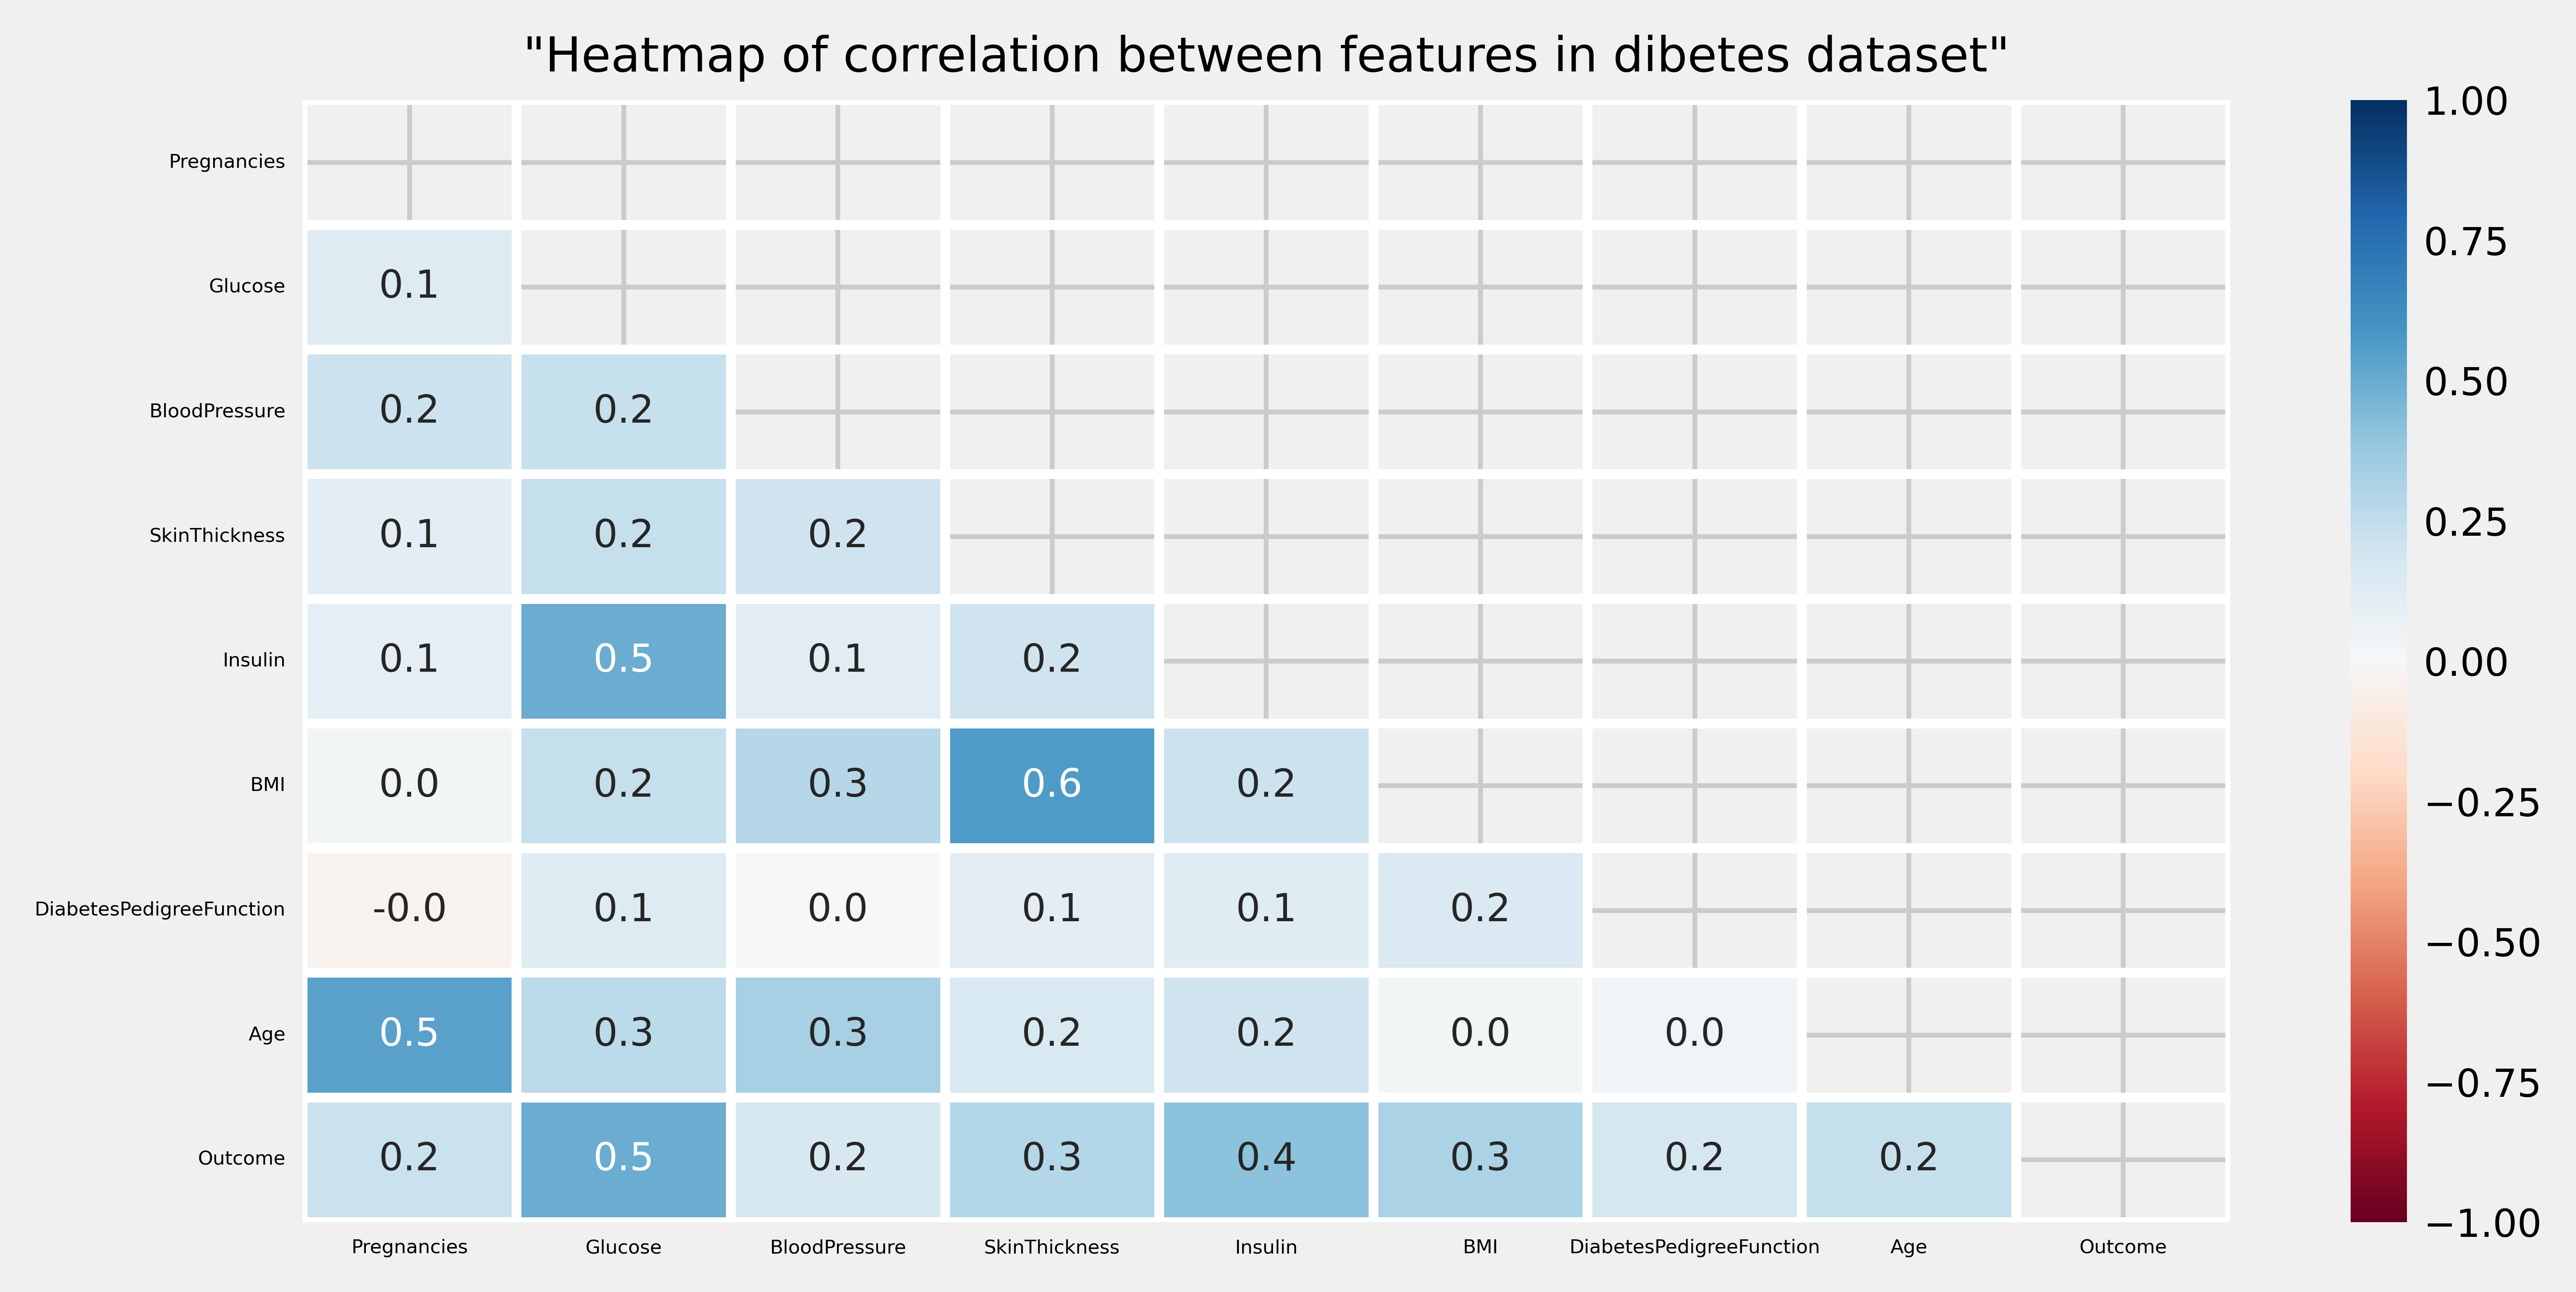

In [65]:
plt.style.use('fivethirtyeight')
fig, ax= plt.subplots(figsize= (8, 4), dpi= 848)
heatmap= sns.heatmap(dataset_corr, ax= ax, vmin= -1, vmax= +1, annot= True, annot_kws={"fontsize": 8}, fmt= '.1f', linecolor= 'white', linewidths= 2, cmap= 'RdBu', mask= heat_mask)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize= 8)
ax.set_yticklabels(dataset.columns[ : -1], fontsize= 4)
ax.set_xticklabels(dataset.columns[ : -1], fontsize= 4, rotation= 0)
ax.set_title('"Heatmap of correlation between features in dibetes dataset"', fontsize= 10);

Lets normal the dataset and check the correlation heatmap

In [66]:
def min_max_normalized(serie):
    return (serie- serie.min())/ (serie.max()- serie.min())

In [67]:
normal_dataset= dataset.copy()
for column_name in numerical_columns:
    normal_dataset[column_name]= min_max_normalized(normal_dataset[column_name])
normal_dataset.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.670968       0.489796       0.304348  0.296875  0.314928   
1     0.058824  0.264516       0.428571       0.239130  0.140625  0.171779   
2     0.470588  0.896774       0.408163       0.282609  0.213942  0.104294   
3     0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4     0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   

   DiabetesPedigreeFunction       Age  Outcome Age-name  
0                  0.234415  0.483333      1.0      old  
1                  0.116567  0.166667      0.0    young  
2                  0.253629  0.183333      1.0    young  
3                  0.038002  0.000000      0.0    young  
4                  0.943638  0.200000      1.0    young

In [68]:
normal_dataset_corr= normal_dataset[numerical_columns].corr()

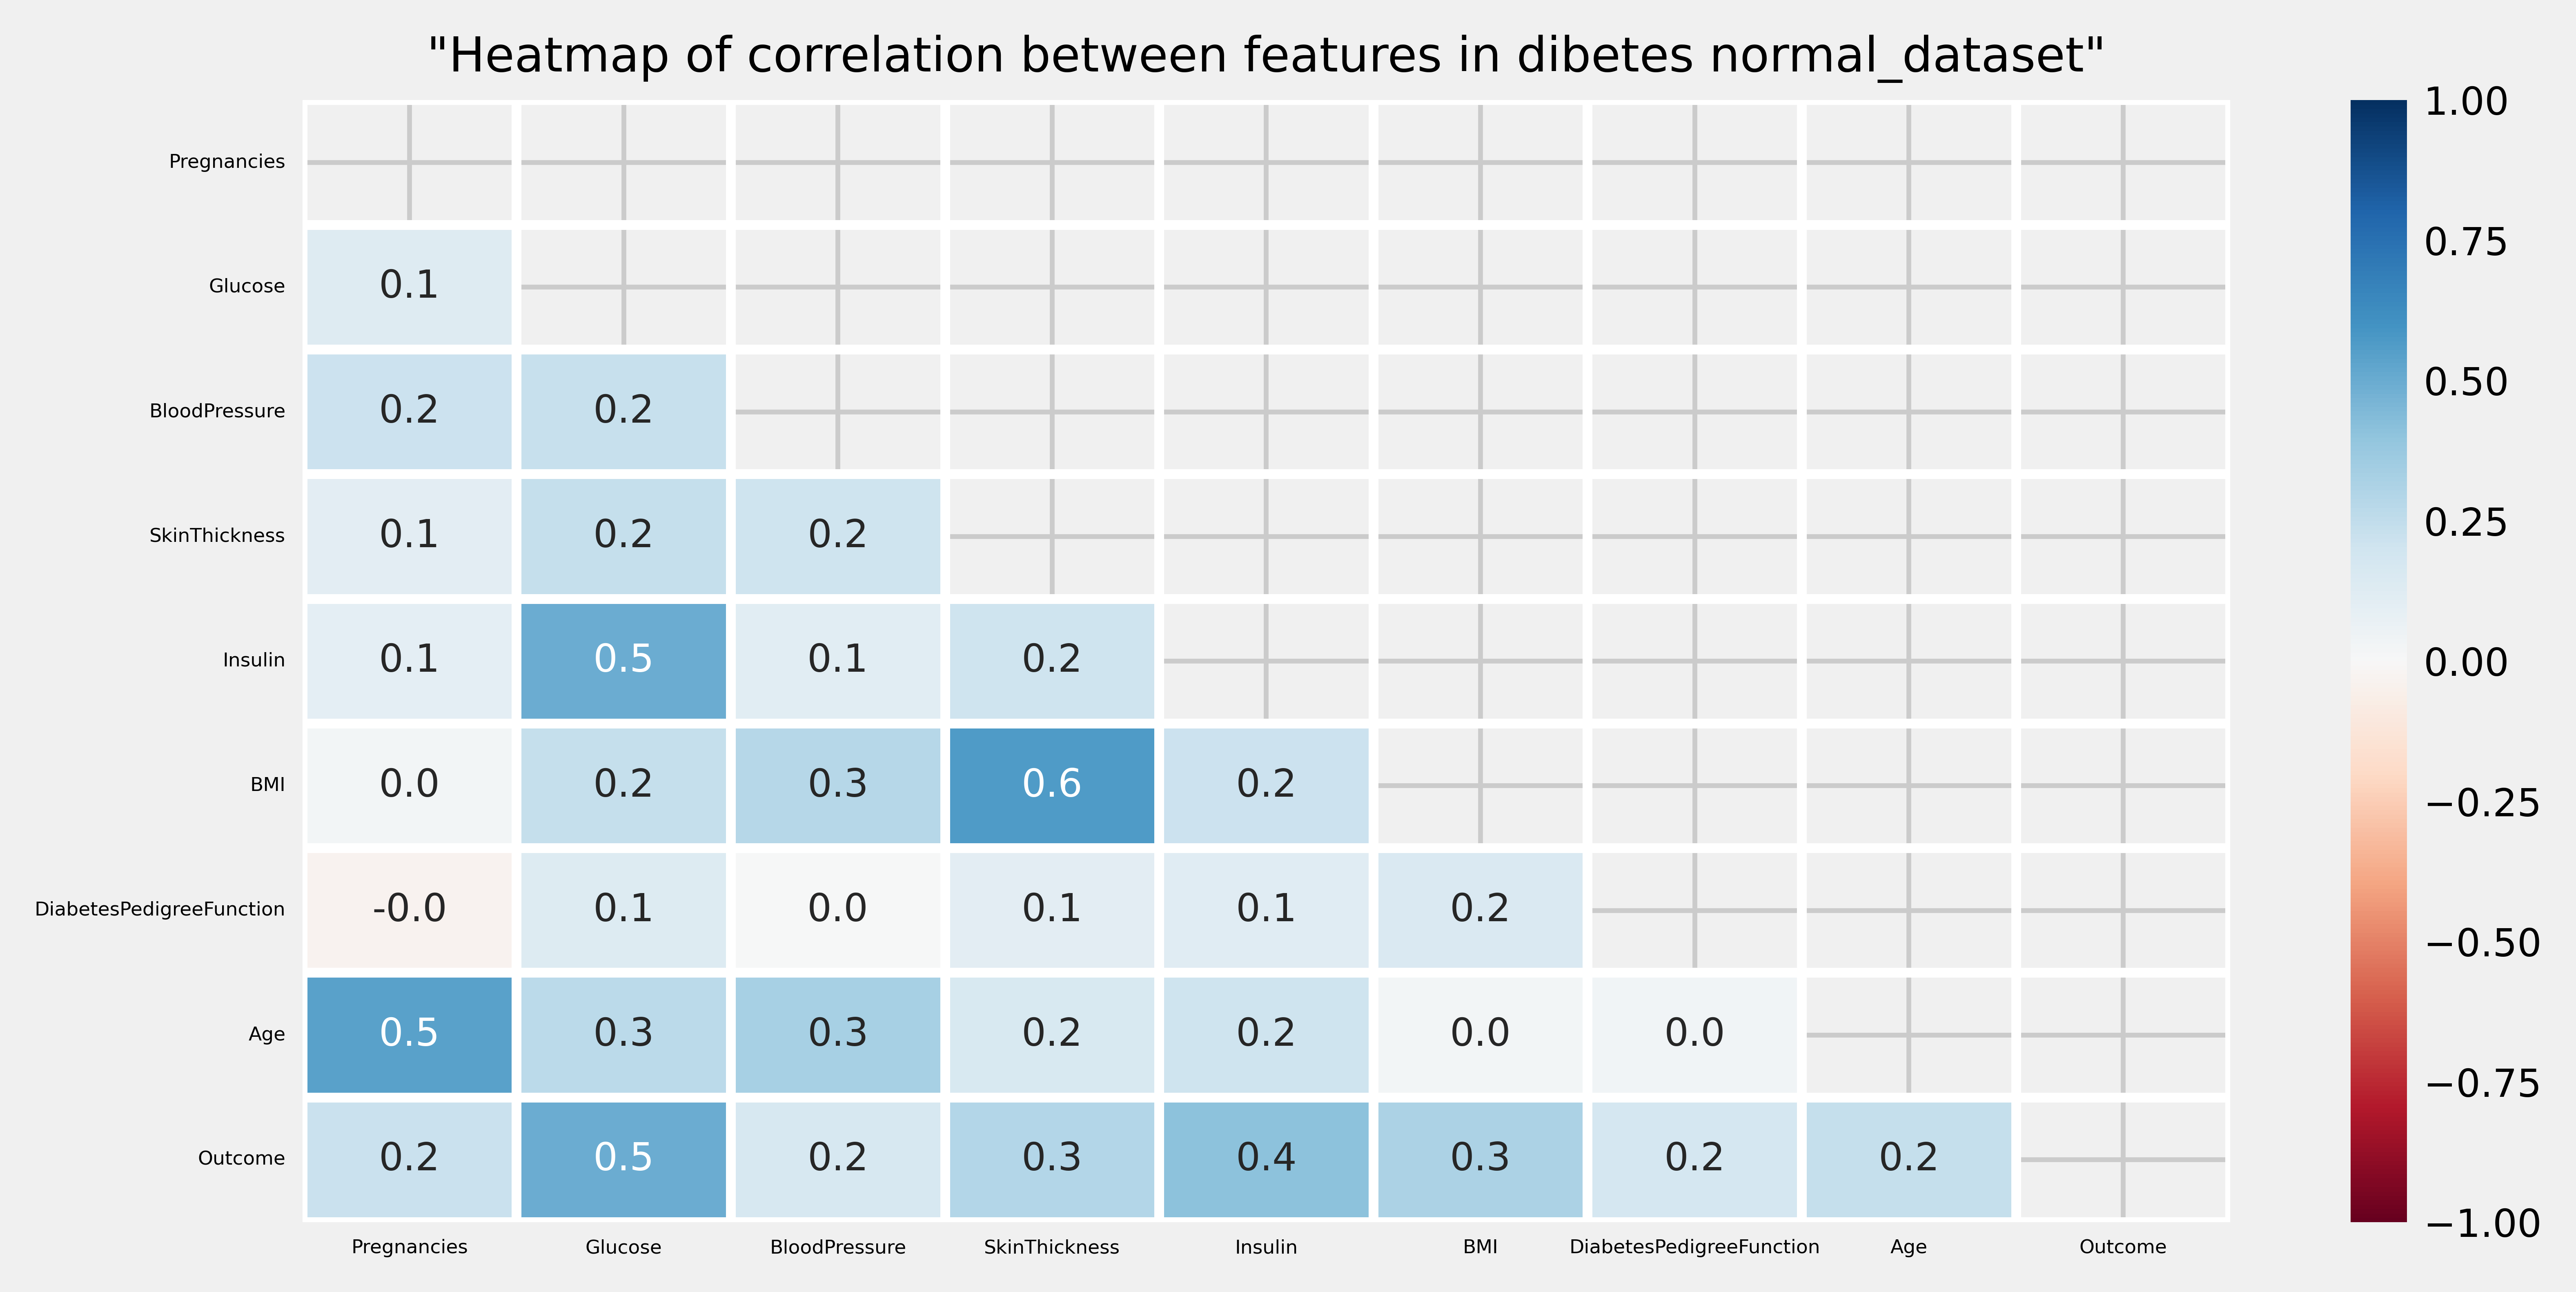

In [69]:
plt.style.use('fivethirtyeight')
fig, ax= plt.subplots(figsize= (8, 4), dpi= 848)
heatmap= sns.heatmap(normal_dataset_corr, ax= ax, vmin= -1, vmax= +1, annot= True, annot_kws={"fontsize": 8}, fmt= '.1f', linecolor= 'white', linewidths= 2, cmap= 'RdBu', mask= heat_mask)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize= 8)
ax.set_yticklabels(dataset.columns[ : -1], fontsize= 4)
ax.set_xticklabels(dataset.columns[ : -1], fontsize= 4, rotation= 0)
ax.set_title('"Heatmap of correlation between features in dibetes normal_dataset"', fontsize= 10);

As you can see the best feature for classification is "Glucose"

In [70]:
dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    261.0  33.6   
1            1     85.0           66.0           29.0    131.0  26.6   
2            8    183.0           64.0           33.0    192.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome Age-name  
0                     0.627   50        1      old  
1                     0.351   31        0    young  
2                     0.672   32        1    young  
3                     0.167   21        0    young  
4                     2.288   33        1    young

# Classification

First step is choosing feature("Glusoce") and then we need to split dataset to train data and test data

In [71]:
X_train, X_test, Y_train, Y_test= train_test_split(dataset.drop(columns= ['Age-name', 'Outcome']), dataset['Outcome'], test_size= 0.2, random_state= 48)

In [72]:
kernels= ['linear', 'rbf', 'poly']

param_grids= {
    'linear' : {'C' : [0.1, 1]},
    'rbf' : {'C' : [0.1, 1], 'gamma' : [0.001, 0.01]},
    'poly' : {'C' : [0.1, 1], 'gamma' : [0.001, 0.01], 'degree' : [2]}
}

results= {}

for kernel in kernels:
    print(f"Running GridSearch for kernel: {kernel}")
    svc= SVC(kernel=kernel)
    grid= GridSearchCV(estimator= svc, param_grid= param_grids[kernel], scoring= 'accuracy', cv= 5, verbose= 3)
    grid.fit(X_train, Y_train)
    
    results[kernel]= {
        'best_params' : grid.best_params_,
        'best_score' : grid.best_score_
    }

for kernel in results:
    print(f"Kernel: {kernel}")
    print(f"Best Parameters: {results[kernel]['best_params']}")
    print(f"Best Cross-Validation Score: {results[kernel]['best_score']:.4f}")


Running GridSearch for kernel: linear
Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END .............................C=0.1;, score=0.789 total time=   0.1s
[CV 2/5] END .............................C=0.1;, score=0.821 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.821 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.764 total time=   0.1s
[CV 5/5] END .............................C=0.1;, score=0.795 total time=   0.1s
[CV 1/5] END ...............................C=1;, score=0.772 total time=   1.9s
[CV 2/5] END ...............................C=1;, score=0.821 total time=   1.2s
[CV 3/5] END ...............................C=1;, score=0.821 total time=   1.7s
[CV 4/5] END ...............................C=1;, score=0.764 total time=   1.1s
[CV 5/5] END ...............................C=1;, score=0.803 total time=   1.8s
Running GridSearch for kernel: rbf
Fitting 5 folds for each of 4 candidates, totalling 20 fi

now lets do it for normal_dataset

In [73]:
X_train, X_test, Y_train, Y_test= train_test_split(normal_dataset.drop(columns= ['Age-name', 'Outcome']), normal_dataset['Outcome'], test_size= 0.2, random_state= 48)

In [74]:
kernels= ['linear', 'rbf', 'poly']

param_grids= {
    'linear': {'C' : [0.01, 0.1, 1, 4]},
    'rbf': {'C' : [0.01, 0.1, 1, 4], 'gamma' : [0.001, 0.01, 0.1, 1]},
    'poly': {'C' : [0.01, 0.1, 1, 4], 'gamma' : [0.001, 0.01, 0.1, 1], 'degree' : [2, 3, 4]}
}

results= {}

for kernel in kernels:
    print(f"Running GridSearch for kernel: {kernel}")
    svc= SVC(kernel= kernel)
    grid= GridSearchCV(estimator= svc, param_grid= param_grids[kernel], scoring= 'accuracy', cv= 5, verbose= 3)
    grid.fit(X_train, Y_train)
    
    results[kernel]= {
        'best_params' : grid.best_params_,
        'best_score' : grid.best_score_
    }

for kernel in results:
    print(f"Kernel: {kernel}")
    print(f"Best Parameters: {results[kernel]['best_params']}")
    print(f"Best Cross-Validation Score: {results[kernel]['best_score']:.4f}")


Running GridSearch for kernel: linear
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ............................C=0.01;, score=0.642 total time=   0.0s
[CV 2/5] END ............................C=0.01;, score=0.642 total time=   0.0s
[CV 3/5] END ............................C=0.01;, score=0.642 total time=   0.0s
[CV 4/5] END ............................C=0.01;, score=0.642 total time=   0.0s
[CV 5/5] END ............................C=0.01;, score=0.648 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.724 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.764 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.756 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.748 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.770 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=0.748 total time=   0.0s
[CV 2/5] EN

It seems that we should apply the rbf in dataset(not in the normal_dataset), C= 1 & gamma= 0.001

# RBF

In [75]:
X_train, X_test, Y_train, Y_test= train_test_split(dataset.drop(columns= ['Age-name', 'Outcome']), dataset['Outcome'], test_size= 0.2, random_state= 48)

In [76]:
rbf_svm= SVC(kernel='rbf', C=1, gamma=0.001)

rbf_svm.fit(X_train, Y_train)

SVC(C=1, gamma=0.001)

for test data

In [77]:
Y_pred= rbf_svm.predict(X_test)

accuracy= accuracy_score(Y_test, Y_pred)
print(f"Accuracy of RBF SVM (C=1, gamma=0.001): {accuracy:.4f}")

Accuracy of RBF SVM (C=1, gamma=0.001): 0.8636


for train data

In [78]:
Y_pred= rbf_svm.predict(X_train)

accuracy= accuracy_score(Y_train, Y_pred)
print(f"Accuracy of RBF SVM (C=1, gamma=0.001): {accuracy:.4f}")

Accuracy of RBF SVM (C=1, gamma=0.001): 0.9121
